In [126]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
from pandas import read_csv
import os
from sklearn import preprocessing
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
np.random.seed(1)
tf.compat.v1.disable_v2_behavior() 
sns.set_theme(style="whitegrid")
if os.name == 'posix':
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt':
    plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
import shap
import warnings


In [127]:
#seoul_pow
#pusan_pow
#jeju_pow
#kor_dust

DATA_NAME = 'seoul_pow'
MODEL_NAME = 'TEST_2'
#Features = ['기온(°C)','강수량(mm)','일조(hr)','일사(MJ/m2)']
Features = ['풍속(m/s)','습도(%)','일사(MJ/m2)','지면온도(°C)','시정(10m)','강수량(mm)','시간','month']
Target = '전력거래량'
CLASSFICATION_EPOCH = 200
EPOCH = 200


dataset = read_csv('./data/'+DATA_NAME+'.csv')

dataset_day = read_csv('./data/'+DATA_NAME+'_day.csv')

print('Data Cols / ',dataset.columns)
#print(dataset.head(10))

Data Cols /  Index(['Unnamed: 0', '연료원', '지역세부구분', '거래일', '시간', '전력거래량', 'YMDH', 'month',
       'fullday', 'season', 'year', '지점', '지점명', '기온(°C)', '강수량(mm)',
       '강수량 QC플래그', '풍속(m/s)', '풍향(16방위)', '습도(%)', '증기압(hPa)', '이슬점온도(°C)',
       '현지기압(hPa)', '해면기압(hPa)', '일조(hr)', '일사(MJ/m2)', '적설(cm)', '3시간신적설(cm)',
       '전운량(10분위)', '중하층운량(10분위)', '운형(운형약어)', '최저운고(100m )', '시정(10m)',
       '지면상태(지면상태코드)', '현상번호(국내식)', '지면온도(°C)', '5cm 지중온도(°C)',
       '10cm 지중온도(°C)', '20cm 지중온도(°C)', '30cm 지중온도(°C)'],
      dtype='object')


In [77]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)
    
    
corr = dataset.corr(method = 'pearson') 
corr2 = dataset.corr(method = 'kendall')
corr3 = dataset.corr(method = 'spearman')

print('\t pearson \t kendall \t spearman')
display_side_by_side(corr.iloc[:,2:3],corr2.iloc[:,2:3],corr3.iloc[:,2:3])

	 pearson 	 kendall 	 spearman


,전력거래량
Unnamed: 0,0.055823
시간,0.156588
전력거래량,1.000000
YMDH,0.061016
month,-0.039755
fullday,0.061015
year,0.061622
지점,NaN
기온(°C),0.240360
강수량(mm),-0.065343


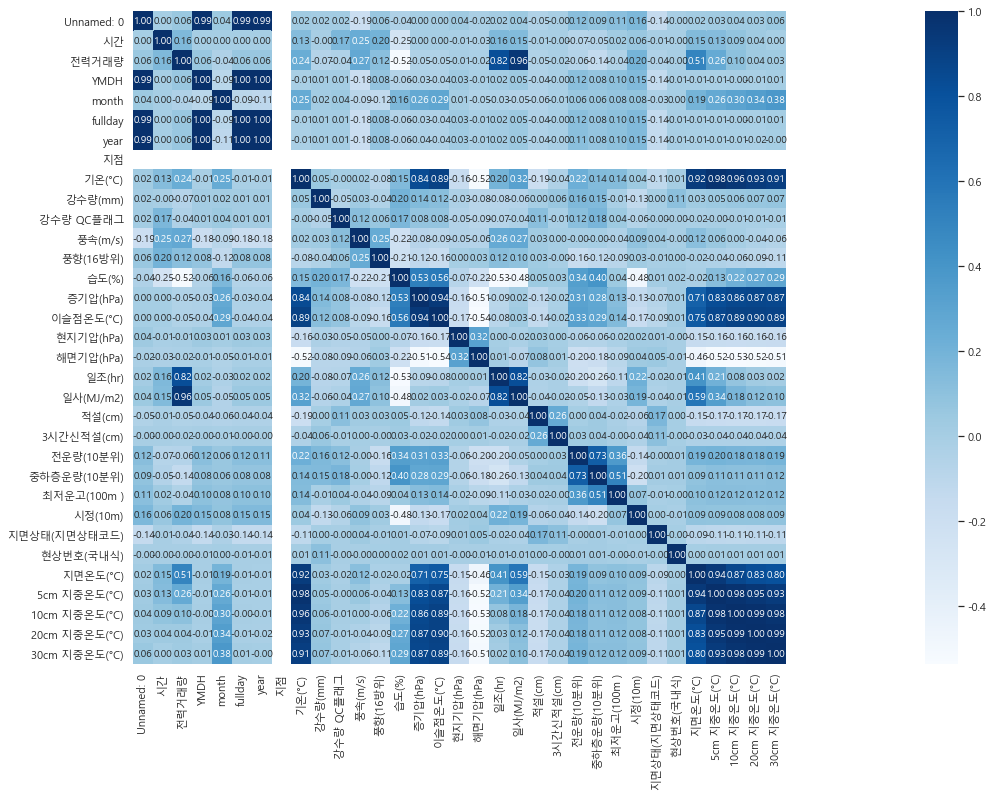

In [78]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, ax = plt.subplots(figsize=(50,12))  
df_heatmap = sns.heatmap(corr, cbar = True, annot = True, annot_kws={'size' : 10}, fmt = '.2f', square = True, cmap = 'Blues')


            풍속(m/s)         습도(%)     일사(MJ/m2)      지면온도(°C)       시정(10m)  \
count  57696.000000  57696.000000  57696.000000  57696.000000  57696.000000   
mean       2.266252     59.006777      0.546242     15.048988   1353.199581   
std        1.290696     20.268670      0.819849     13.397799    653.724233   
min        0.000000      0.000000      0.000000    -13.600000      0.000000   
1%         0.200000     18.000000      0.000000     -7.500000      0.000000   
10%        0.800000     32.000000      0.000000     -0.900000    373.000000   
20%        1.100000     40.000000      0.000000      0.800000    638.000000   
25%        1.300000     44.000000      0.000000      3.000000    800.000000   
30%        1.500000     47.000000      0.000000      5.300000    946.000000   
40%        1.800000     53.000000      0.000000     10.200000   1245.000000   
50%        2.100000     59.000000      0.020000     14.700000   1509.000000   
60%        2.400000     65.000000      0.250000     

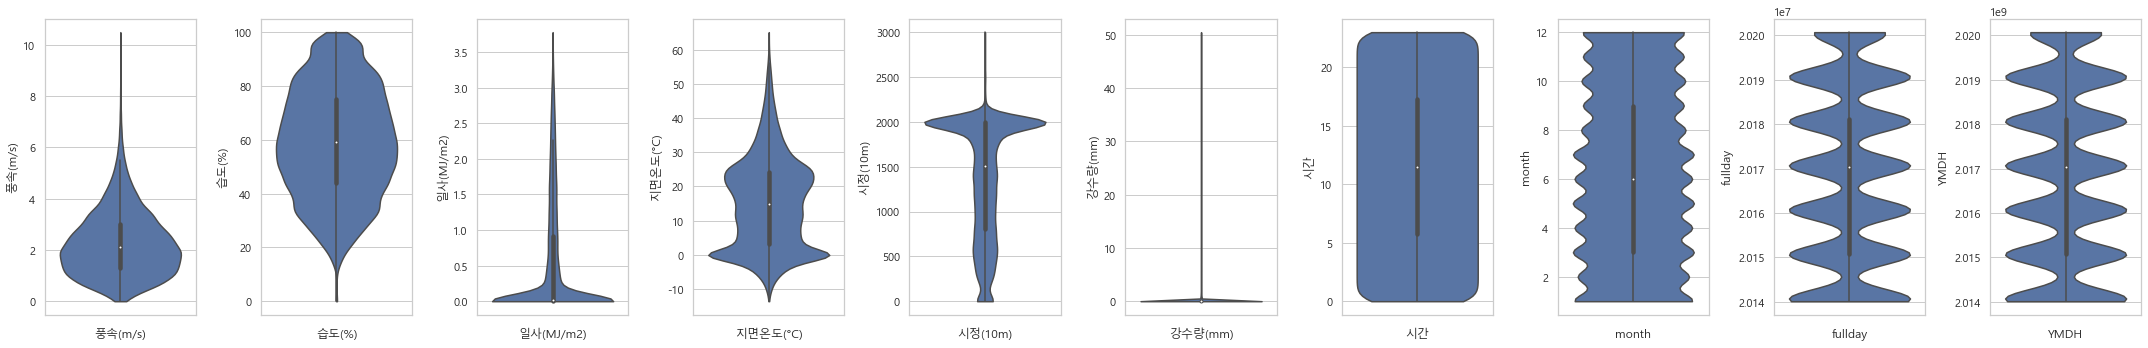

,풍속(m/s),습도(%),일사(MJ/m2),지면온도(°C),시정(10m),강수량(mm),시간,month,fullday,YMDH
풍속(m/s),1.000000,-0.215415,0.271211,0.117153,0.090930,0.031012,2.464130e-01,-9.024560e-02,-0.177759,-0.177758
습도(%),-0.215415,1.000000,-0.484609,-0.017211,-0.477694,0.198958,-2.500349e-01,1.647473e-01,-0.061254,-0.061255
일사(MJ/m2),0.271211,-0.484609,1.000000,0.591502,0.185867,-0.064454,1.468886e-01,-5.090862e-02,0.048855,0.048855
지면온도(°C),0.117153,-0.017211,0.591502,1.000000,0.088621,0.031636,1.460083e-01,1.939261e-01,-0.006547,-0.006546
시정(10m),0.090930,-0.477694,0.185867,0.088621,1.000000,-0.127207,5.885237e-02,8.430187e-02,0.153618,0.153618
강수량(mm),0.031012,0.198958,-0.064454,0.031636,-0.127207,1.000000,-4.001053e-03,2.220285e-02,0.012465,0.012465
시간,0.246413,-0.250035,0.146889,0.146008,0.058852,-0.004001,1.000000e+00,1.021974e-17,0.000000,0.000004
month,-0.090246,0.164747,-0.050909,0.193926,0.084302,0.022203,1.021974e-17,1.000000e+00,-0.090890,-0.090890
fullday,-0.177759,-0.061254,0.048855,-0.006547,0.153618,0.012465,0.000000e+00,-9.088977e-02,1.000000,1.000000
YMDH,-0.177758,-0.061255,0.048855,-0.006546,0.153618,0.012465,3.631481e-06,-9.088977e-02,1.000000,1.000000


In [129]:
print(dataset[Features].describe(percentiles=[.01,0.1,0.2,.25,0.3,.4,.50,0.6,.75,0.8,.90,.95,.99]))
Features.append('fullday')
Features.append('YMDH')

DF=dataset


TEST=DF[Features]

Target_LIST = DF[Target].to_list()

fig = plt.figure(figsize=(3*len(Features),5))
gs = fig.add_gridspec(1, len(Features))

for i in range(len(Features)):
    ax = fig.add_subplot(gs[0, i])
    sns.violinplot(y=TEST[Features[i]],cut=0)
    ax.set_xlabel(Features[i])

fig.tight_layout()
plt.show()

TEST.corr()

In [111]:


#['기온(°C)','습도(%)','전력거래량','강수량(mm)','풍속(m/s)','일조(hr)','일사(MJ/m2)']
#이하, 초과 [MAX, MIN]

#    '0': {
#        '기온(°C)': [[1.00, .75]],'강수량(mm)': [[1.00, .75]]
#    }, 
# Features = ['풍속(m/s)','습도(%)','일사(MJ/m2)','지면온도(°C)']
FeaturesRange = {
    '0': {
        '지면온도(°C)': [[0.25, 0.00]]
        #'강수량(mm)': [[1.00, 0.95]]
        #'습도(%)': [[.75, 0.00]],'풍속(m/s)': [[0.99, 0.00]],'일사(MJ/m2)': [[1.00, .55]], 
        #'지면온도(°C)': [[1.00, .75]]
    }, 
    '1': {
        '습도(%)': [[1.00, .75]]
    }, 
    '2': {
        '풍속(m/s)': [[1.0, 0.90]]
    },
    '3': {
        '일사(MJ/m2)': [[0.45, 0.00]]
    }
}
'''
FeaturesRange = {
    '0': {
        '일조(hr)': [[1.0, 0.75]]
    }, 
    '1': {
        '일조(hr)': [[0.75, 0.5]]
    }, 
    '2': {
        '일조(hr)': [[0.5, 0.25]]
    }, 
    '3': {
        '일조(hr)': [[0.25, 0.00]]
    }
}
'''

"\nFeaturesRange = {\n    '0': {\n        '일조(hr)': [[1.0, 0.75]]\n    }, \n    '1': {\n        '일조(hr)': [[0.75, 0.5]]\n    }, \n    '2': {\n        '일조(hr)': [[0.5, 0.25]]\n    }, \n    '3': {\n        '일조(hr)': [[0.25, 0.00]]\n    }\n}\n"

In [112]:
OTHER_FLAG = True
def GetSubSets(_DF,_dataset_day,FeaturesRange):
    
    full_df = _DF
    full_df['Group'] = 'Other'

    day_df = _dataset_day
    LAST_DAY = full_df[-2:-1]
    LAST_DAY = int(LAST_DAY['fullday'])
    CAP_DAY =[]
    print(LAST_DAY)
    

    #print(FeaturesRange)
    #{'0': {'temprt': [[80, 70]], 'rain': [[90, 78.2]], 'wnd_spd': [[100, 90]], 'humdt': [[80, 70]], 'cloud': [[100, 90]]}, '1': {'rain': [[100, 90]]}, '2': {'temprt': [[90, 80]], 'humdt': [[90, 80]]}, '3': {'temprt': [[100, 90]], 'humdt': [[100, 90]]}}
    #del FeaturesRange['0']
    res_GDF = []
    GroupDF = {}
    for Groups in FeaturesRange:
        TMP = FeaturesRange[Groups]
        GroupDF[Groups] = day_df
        for Feature in TMP:
            Filters = TMP[Feature]
            F_MAX = day_df[Feature].max()
            F_MIN = day_df[Feature].min()
            ABSRange = abs(F_MIN-F_MAX)

            for MAX,MIN in Filters:
                MAX=ABSRange*MAX
                MIN=ABSRange*MIN
                
                MAX = MAX+F_MIN
                MIN = MIN+F_MIN

                #print(MAX,F_MAX,ABSRange,F_MIN,F_MAX,Feature)
                GroupDF[Groups] = GroupDF[Groups].loc[(GroupDF[Groups][Feature] > MIN) & (GroupDF[Groups][Feature] <= MAX)]
        #print(GroupDF[Groups].describe())

    for Groups in GroupDF:
        list_of_day = GroupDF[Groups]['fullday'].tolist()
        TMP_DATAFRAME = pd.DataFrame()
        CAP_DAY+=list_of_day
        if LAST_DAY in list_of_day:
            list_of_day.remove(LAST_DAY)
        
        for i in list_of_day:
            tmp_ST = full_df.loc[full_df['fullday']==i].index[0]
            TMP_DF = pd.DataFrame(full_df[tmp_ST:tmp_ST+24])
            TMP_DF.reset_index(inplace=True, drop=True)
            TMP_DF.insert(loc=0, column='TARGET', value=Target_LIST[tmp_ST+24:tmp_ST+48])
            
            TMP_DATAFRAME = pd.concat([TMP_DATAFRAME,TMP_DF],ignore_index=True)
            
        TMP_DATAFRAME['Group'] = Groups
        TMP_DATAFRAME.sort_values("YMDH", ascending=True)
        if not TMP_DATAFRAME.empty:
            res_GDF.append(TMP_DATAFRAME)
        
    full_df = full_df.shift(24)
    full_df.insert(loc=0, column='TARGET', value=Target_LIST)
    
    full_df = full_df.drop(full_df.loc[full_df['fullday'].isin(CAP_DAY)].index, errors='ignore')
    
    full_df=full_df.dropna(axis=0)

    full_df = full_df.sort_values("YMDH", ascending=True)
    full_df.reset_index(inplace=True, drop=True)
    full_df['fullday'] = full_df['fullday'].astype(int)
    if not full_df.empty:
        res_GDF.append(full_df)
    else:
        OTHER_FLAG=False

    '''
    for Groups in GroupDF:
        full_df = pd.concat([full_df,GroupDF[Groups]],ignore_index=True)
    full_df = full_df.sort_values("ymdhms", ascending=True)
    print(full_df.groupby('Group').count())
    '''
    
    return res_GDF


In [113]:
RES_TEST = GetSubSets(TEST,dataset_day,FeaturesRange)
for Q in RES_TEST:
    print(Q.groupby('Group').count())

Features.remove('fullday')
Features.remove('YMDH')



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


20200731
       TARGET  풍속(m/s)  습도(%)  일사(MJ/m2)  지면온도(°C)  시정(10m)  강수량(mm)     시간  \
Group                                                                         
0       12984    12984  12984      12984     12984    12984    12984  12984   

       month  fullday   YMDH  
Group                         
0      12984    12984  12984  
       TARGET  풍속(m/s)  습도(%)  일사(MJ/m2)  지면온도(°C)  시정(10m)  강수량(mm)    시간  \
Group                                                                        
1        5472     5472   5472       5472      5472     5472     5472  5472   

       month  fullday  YMDH  
Group                        
1       5472     5472  5472  
       TARGET  풍속(m/s)  습도(%)  일사(MJ/m2)  지면온도(°C)  시정(10m)  강수량(mm)   시간  \
Group                                                                       
2         144      144    144        144       144      144      144  144   

       month  fullday  YMDH  
Group                        
2        144      144   144  
       TARGET

In [114]:

#'MINMAX'
#'STD'
#'YEO'
# ''
SCALE_FUNC = 'MINMAX'

def SCALE_FUCTIONS(_DF):
    TMP_TARGET = _DF['TARGET'].to_list()
    
    _DF=_DF[Features]
    if SCALE_FUNC == 'MINMAX':
        _DF = MINMAX_scaler.fit_transform(_DF)
    elif SCALE_FUNC == 'STD':
        _DF = STD_scaler.fit_transform(_DF.values)
    elif SCALE_FUNC == 'YEO':
        _DF = YEO_scaler.fit_transform(_DF)
    else:
        _DF = _DF
    
    _DF = pd.DataFrame(_DF,columns=Features)
    _DF.insert(loc=0, column='TARGET', value=TMP_TARGET)
    return _DF
    

MINMAX_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
STD_scaler = preprocessing.StandardScaler()
YEO_scaler = preprocessing.PowerTransformer(method='yeo-johnson')

ALL_X=DF[Features]
print(ALL_X)
ALL_X = ALL_X.shift(24)
ALL_X.insert(loc=0, column='TARGET', value=Target_LIST)
ALL_X=ALL_X.dropna(axis=0)
ALL_X.reset_index(inplace=True, drop=True)
RES_TEST.append(ALL_X)

for i in range(len(RES_TEST)):
    RES_TEST[i] = SCALE_FUCTIONS(RES_TEST[i])
    

       풍속(m/s)  습도(%)  일사(MJ/m2)  지면온도(°C)  시정(10m)  강수량(mm)  시간  month
0          2.3   66.0       0.00      -0.1      0.0      0.0   1      1
1          1.7   67.0       0.00      -0.3      0.0      0.0   2      1
2          1.4   60.0       0.00      -0.4    600.0      0.0   3      1
3          2.8   59.0       0.00      -0.6    600.0      0.0   4      1
4          2.0   56.0       0.00      -0.7    800.0      0.0   5      1
...        ...    ...        ...       ...      ...      ...  ..    ...
57691      2.8   83.0       0.09      25.7   1909.0      0.0  20      7
57692      2.2   86.0       0.00      25.3   1519.0      0.0  21      7
57693      1.8   87.0       0.00      25.4   1381.0      0.0  22      7
57694      2.4   90.0       0.00      25.3    852.0      0.2  23      7
57695      1.0   86.0       0.00      23.4   1656.0      0.0   0      7

[57696 rows x 8 columns]


In [69]:
'''
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
  # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i*24))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
  # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i*24))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
  # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
  # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
'''

"\ndef series_to_supervised(data, n_in=1, n_out=1, dropnan=True):\n    n_vars = 1 if type(data) is list else data.shape[1]\n    df = pd.DataFrame(data)\n    cols, names = list(), list()\n  # input sequence (t-n, ... t-1)\n    for i in range(n_in, 0, -1):\n        cols.append(df.shift(i*24))\n        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]\n  # forecast sequence (t, t+1, ... t+n)\n    for i in range(0, n_out):\n        cols.append(df.shift(-i*24))\n        if i == 0:\n            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]\n        else:\n            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]\n  # put it all together\n    agg = pd.concat(cols, axis=1)\n    agg.columns = names\n  # drop rows with NaN values\n    if dropnan:\n        agg.dropna(inplace=True)\n    return agg\n"

In [115]:
G_TRAIN_X = []
G_TRAIN_y = []

G_TEST_X = []
G_TEST_y = []

G_DISPLAY_Y = []
G_DISPLAY_TEST_Y = []

for G in RES_TEST:
    values = G.values
    Xdata = values[:, 1:]
    Xdata = Xdata.reshape((int(Xdata.shape[0]/24),24,len(Features)))
    
    G_TRAIN_X.append(Xdata[:int(Xdata.shape[0]*0.8)])
    G_TEST_X.append(Xdata[int(Xdata.shape[0]*0.8):])
    
    Ydata = values[:, 0]
    Ydata = Ydata.reshape((int(Ydata.shape[0]/24),24))
    
    G_DISPLAY_Y.append(Ydata[:int(Ydata.shape[0]*0.8)])
    G_DISPLAY_TEST_Y.append(Ydata[int(Ydata.shape[0]*0.8):])
    
    Ydata = Ydata.reshape((Ydata.shape[0],Ydata.shape[1],1))

    G_TRAIN_y.append(Ydata[:int(Ydata.shape[0]*0.8)])
    G_TEST_y.append(Ydata[int(Ydata.shape[0]*0.8):])


CLASSIFI_X = G_TRAIN_X[0]
CLASSIFI_y = [0 for _ in range(G_TRAIN_X[0].shape[0])]

CLASSIFI_TEST_X = G_TEST_X[0]
CLASSIFI_TEST_y = [0 for _ in range(G_TEST_X[0].shape[0])]

for G in range(1,len(RES_TEST)-1):
    CLASSIFI_X = np.concatenate((CLASSIFI_X, G_TRAIN_X[G]), axis=0)
    CLASSIFI_y = CLASSIFI_y + [G for _ in range(G_TRAIN_X[G].shape[0])]
    
    CLASSIFI_TEST_X = np.concatenate((CLASSIFI_TEST_X, G_TEST_X[G]), axis=0)
    CLASSIFI_TEST_y = CLASSIFI_TEST_y + [G for _ in range(G_TEST_X[G].shape[0])]

CLASSIFI_X = CLASSIFI_X.reshape((CLASSIFI_X.shape[0],CLASSIFI_X.shape[1]*CLASSIFI_X.shape[2]))
CLASSIFI_TEST_X = CLASSIFI_TEST_X.reshape((CLASSIFI_TEST_X.shape[0],CLASSIFI_TEST_X.shape[1]*CLASSIFI_TEST_X.shape[2]))

CLASSIFI_y = np.array(CLASSIFI_y)
CLASSIFI_y_Dis = CLASSIFI_y
CLASSIFI_y = pd.get_dummies(CLASSIFI_y)

CLASSIFI_TEST_y
CLASSIFI_TEST_y = np.array(CLASSIFI_TEST_y)
CLASSIFI_TEST_y_Dis = CLASSIFI_TEST_y
CLASSIFI_TEST_y = pd.get_dummies(CLASSIFI_TEST_y)

print(CLASSIFI_X.shape)
print(CLASSIFI_y.shape)
print(CLASSIFI_y.head())
print(G_DISPLAY_Y)

(2493, 192)
(2493, 5)
   0  1  2  3  4
0  1  0  0  0  0
1  1  0  0  0  0
2  1  0  0  0  0
3  1  0  0  0  0
4  1  0  0  0  0
[array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([[0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 5.677000e-03, 3.909540e-01, 1.009657e+00,
        1.225105e+00, 2.630794e+00, 4.488041e+00, 5.965023e+00,
        6.387662e+00, 5.558969e+00, 5.217524e+00, 3.599324e+00,
        2.515713e+00, 1.750884e+00, 5.673800e-01, 5.407200e-02,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00],
      

In [116]:
from tensorflow.keras import layers
from tensorflow import keras

MODEL_PATH ='models/'+DATA_NAME+'/'+MODEL_NAME 
os.makedirs(MODEL_PATH, exist_ok=True)

csv_logger = tf.keras.callbacks.CSVLogger(MODEL_PATH+'/'+MODEL_NAME+'_CLASSIFICATION_epoch'+'.csv', separator=',')

MD = keras.Sequential()
MD.add(layers.Dense(CLASSIFI_X.shape[1], input_dim = CLASSIFI_X.shape[1], activation = 'relu')) # Rectified Linear Unit Activation Function
MD.add(layers.Dense(64, activation = 'relu'))
MD.add(layers.Dense(32, activation = 'relu'))
MD.add(layers.Dense(CLASSIFI_y.shape[1], activation = 'softmax')) # Softmax for multi-class classification
# Compile model here
MD.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

MD.fit(CLASSIFI_X, CLASSIFI_y, epochs=CLASSFICATION_EPOCH, verbose=1, shuffle=False, callbacks=[csv_logger])

MD.save(MODEL_PATH+'/'+MODEL_NAME+'_CLASSIFICATION.h5')
#model_functional.compile(loss='mean_absolute_error', optimizer=optimizer, metrics=["mean_absolute_error"])
#model.compile(loss='mean_squared_logarithmic_error', optimizer=optimizer, metrics=['accuracy'])


Train on 2493 samples
Epoch 1/200
2493/2493 [==============================] - 1s 523us/sample - loss: 1.7999 - acc: 0.5475
Epoch 2/200
2493/2493 [==============================] - 0s 96us/sample - loss: 1.7391 - acc: 0.2940
Epoch 3/200
2493/2493 [==============================] - 0s 101us/sample - loss: 1.4742 - acc: 0.2992
Epoch 4/200
2493/2493 [==============================] - 0s 100us/sample - loss: 1.4533 - acc: 0.3726
Epoch 5/200
2493/2493 [==============================] - 0s 98us/sample - loss: 1.3686 - acc: 0.2832
Epoch 6/200
2493/2493 [==============================] - 0s 91us/sample - loss: 1.5339 - acc: 0.2643
Epoch 7/200
2493/2493 [==============================] - 0s 98us/sample - loss: 1.5338 - acc: 0.1340
Epoch 8/200
2493/2493 [==============================] - 0s 107us/sample - loss: 1.3902 - acc: 0.2459
Epoch 9/200
2493/2493 [==============================] - 0s 98us/sample - loss: 1.3952 - acc: 0.3361
Epoch 10/200
2493/2493 [==============================] - 0s 100u

2493/2493 [==============================] - 0s 100us/sample - loss: 0.5922 - acc: 0.7561
Epoch 81/200
2493/2493 [==============================] - 0s 108us/sample - loss: 0.5899 - acc: 0.7585
Epoch 82/200
2493/2493 [==============================] - 0s 100us/sample - loss: 0.5861 - acc: 0.7605
Epoch 83/200
2493/2493 [==============================] - 0s 96us/sample - loss: 0.5835 - acc: 0.7625
Epoch 84/200
2493/2493 [==============================] - 0s 98us/sample - loss: 0.5808 - acc: 0.7633
Epoch 85/200
2493/2493 [==============================] - 0s 93us/sample - loss: 0.5783 - acc: 0.7649
Epoch 86/200
2493/2493 [==============================] - 0s 84us/sample - loss: 0.5777 - acc: 0.7657
Epoch 87/200
2493/2493 [==============================] - 0s 92us/sample - loss: 0.5791 - acc: 0.7657
Epoch 88/200
2493/2493 [==============================] - 0s 98us/sample - loss: 0.5769 - acc: 0.7657
Epoch 89/200
2493/2493 [==============================] - 0s 96us/sample - loss: 0.5706 - ac

2493/2493 [==============================] - 0s 92us/sample - loss: 0.2826 - acc: 0.8781
Epoch 160/200
2493/2493 [==============================] - 0s 97us/sample - loss: 0.2788 - acc: 0.8797
Epoch 161/200
2493/2493 [==============================] - 0s 102us/sample - loss: 0.2765 - acc: 0.8805
Epoch 162/200
2493/2493 [==============================] - 0s 98us/sample - loss: 0.2752 - acc: 0.8797
Epoch 163/200
2493/2493 [==============================] - 0s 98us/sample - loss: 0.2742 - acc: 0.8797
Epoch 164/200
2493/2493 [==============================] - 0s 98us/sample - loss: 0.2725 - acc: 0.8813
Epoch 165/200
2493/2493 [==============================] - 0s 101us/sample - loss: 0.2695 - acc: 0.8809
Epoch 166/200
2493/2493 [==============================] - 0s 99us/sample - loss: 0.2688 - acc: 0.8817
Epoch 167/200
2493/2493 [==============================] - 0s 95us/sample - loss: 0.2673 - acc: 0.8825
Epoch 168/200
2493/2493 [==============================] - 0s 100us/sample - loss: 0.

In [117]:
CLASSFICATION_PATH = MODEL_PATH+'/'+MODEL_NAME+'_CLASSIFICATION.h5'

import random

testlinC = []
for i in range(100):
    testlinC.append(random.randint(0, CLASSIFI_TEST_X.shape[0]-1))

enTest_X = CLASSIFI_TEST_X[testlinC, :]
enTest_y = CLASSIFI_TEST_y_Dis[testlinC]

enTest_dis_y= G_DISPLAY_TEST_Y[:-1]
enTest_dis_y = np.vstack(enTest_dis_y)
enTest_dis_y = enTest_dis_y[testlinC,:]

print(enTest_dis_y.shape)

print(enTest_X.shape)

(100, 24)
(100, 192)


In [118]:
explainer = shap.DeepExplainer(MD, CLASSIFI_X)
expected_value = explainer.expected_value
shap_values = explainer.shap_values(enTest_X)

In [119]:
#print(shap_values[0].shape)
import json
with open(MODEL_PATH+'/'+MODEL_NAME+'_FEAT_RANGE.json', "w") as outfile: 
    json.dump(FeaturesRange, outfile)
pd.DataFrame( data = {'expected_value': expected_value } ).to_csv(MODEL_PATH+'/'+MODEL_NAME+'_SHAP_EXP.csv')
pd.DataFrame( data = {'Features': Features } ).to_csv(MODEL_PATH+'/'+MODEL_NAME+'_Features.csv')
pd.DataFrame(data = {'TEST_idx': testlinC }).to_csv(MODEL_PATH+'/'+MODEL_NAME+'_TEST_idx.csv')

for i in range(len(shap_values)):
    if i == (len(shap_values)-1) and OTHER_FLAG:
        pd.DataFrame(shap_values[i]).to_csv(MODEL_PATH+'/'+MODEL_NAME+'_SHAP_G_Other.csv')
    else:
        pd.DataFrame(shap_values[i]).to_csv(MODEL_PATH+'/'+MODEL_NAME+'_SHAP_G_'+str(i)+'.csv')


weights_dict = [dict() for _ in range(len(RES_TEST))]
def TEMPFUNC(TI):
    return models[TI].predict(G_TRAIN_X[TI])


# reshape input to be 3D [samples, timesteps, features]
#train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
#test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
#validate_X = validate_X.reshape((validate_X.shape[0], 1, validate_X.shape[1]))



def build_model(train_X, train_y ):
    print(train_X.shape)
    M = tf.keras.Sequential()
    M.add(tf.keras.layers.LSTM(200,  input_shape = (train_X.shape[1], train_X.shape[2])))
    M.add(tf.keras.layers.RepeatVector(24))
    M.add(tf.keras.layers.LSTM(200,  return_sequences=True))
    M.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(100, activation='relu')))
    M.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(1)))

    optimizer = tf.keras.optimizers.Adam()

    M.compile(loss='mean_absolute_error', optimizer=optimizer, metrics=['mean_squared_error','mean_squared_logarithmic_error'])
    return M




models = []
for GN in range(len(RES_TEST)):
    models.append(build_model(G_TRAIN_X[GN],G_TRAIN_y[GN]))

    
    
for GN in range(len(models)):
    GNAME = str(GN)
    if GN == len(models)-2 and OTHER_FLAG:
        GNAME = 'Other'
    elif GN == len(models)-1:
        GNAME = 'All'
        
    _path = 'models/'+DATA_NAME+'/'+MODEL_NAME+'/G_'+GNAME
    os.makedirs(_path, exist_ok=True)
    weight_callback = tf.keras.callbacks.LambdaCallback( on_epoch_end=lambda epoch, logs: weights_dict[GN].update({epoch:TEMPFUNC(GN)}))
    csv_logger = tf.keras.callbacks.CSVLogger(_path+'/'+DATA_NAME+'_G_'+GNAME+'_epoch'+'.csv', separator=',')
    
    models[GN].fit(G_TRAIN_X[GN], G_TRAIN_y[GN], epochs=EPOCH, verbose=1, shuffle=False, callbacks=[weight_callback,csv_logger] )

    BIAS_DEF = []
    VAR_DEF = []
    for T in weights_dict[GN]:
        YT = weights_dict[GN][T].reshape((int(G_TRAIN_X[GN].shape[0]),24))
        YT_var = [np.mean(x) for x in YT]
        var = [pow(np.mean(x)-np.mean(YT_var),2) for x in YT]
        bias = []
        for Gi in range(0,len(G_DISPLAY_Y[GN])):
            for Y_hat in range(len(G_DISPLAY_Y[GN][Gi])):
                bias.append(pow(np.mean(G_DISPLAY_Y[GN][Gi][Y_hat]) - YT[Gi][Y_hat],2))
        VAR_DEF.append(np.mean(var))
        BIAS_DEF.append(np.mean(bias))
    BV = pd.DataFrame( data = {'BIAS': BIAS_DEF, 'VAR': VAR_DEF} )
    
    models[GN].save(_path+'/'+DATA_NAME+'_G_'+GNAME+'.h5')
    BV.to_csv(_path+'/'+DATA_NAME+'_G_'+GNAME+'_BIAS_VAR'+'.csv', index=False) 

(432, 24, 8)
(182, 24, 8)
(4, 24, 8)
(1060, 24, 8)
(815, 24, 8)
(1922, 24, 8)
Train on 432 samples
Epoch 1/200
432/432 [==============================] - 5s 10ms/sample - loss: 1.3493 - mean_squared_error: 6.6524 - mean_squared_logarithmic_error: 0.7039
Epoch 2/200
432/432 [==============================] - 1s 2ms/sample - loss: 1.3236 - mean_squared_error: 6.5492 - mean_squared_logarithmic_error: 0.6806
Epoch 3/200
432/432 [==============================] - 1s 2ms/sample - loss: 1.0341 - mean_squared_error: 3.4636 - mean_squared_logarithmic_error: 0.2739
Epoch 4/200
432/432 [==============================] - 1s 2ms/sample - loss: 0.6731 - mean_squared_error: 1.4969 - mean_squared_logarithmic_error: 0.1163
Epoch 5/200
432/432 [==============================] - 1s 2ms/sample - loss: 0.6002 - mean_squared_error: 1.4005 - mean_squared_logarithmic_error: 0.0947
Epoch 6/200
432/432 [==============================] - 1s 2ms/sample - loss: 0.5467 - mean_squared_error: 1.2726 - mean_squared_lo

432/432 [==============================] - 1s 2ms/sample - loss: 0.4735 - mean_squared_error: 1.0754 - mean_squared_logarithmic_error: 0.0708
Epoch 54/200
432/432 [==============================] - 1s 2ms/sample - loss: 0.4615 - mean_squared_error: 1.0130 - mean_squared_logarithmic_error: 0.0675
Epoch 55/200
432/432 [==============================] - 1s 2ms/sample - loss: 0.4624 - mean_squared_error: 1.0420 - mean_squared_logarithmic_error: 0.0686
Epoch 56/200
432/432 [==============================] - 1s 2ms/sample - loss: 0.4532 - mean_squared_error: 0.9859 - mean_squared_logarithmic_error: 0.0657
Epoch 57/200
432/432 [==============================] - 1s 2ms/sample - loss: 0.4550 - mean_squared_error: 0.9806 - mean_squared_logarithmic_error: 0.0650
Epoch 58/200
432/432 [==============================] - 1s 2ms/sample - loss: 0.4655 - mean_squared_error: 1.0039 - mean_squared_logarithmic_error: 0.0682
Epoch 59/200
432/432 [==============================] - 1s 2ms/sample - loss: 0.466

432/432 [==============================] - 1s 2ms/sample - loss: 0.4291 - mean_squared_error: 0.9109 - mean_squared_logarithmic_error: 0.0612
Epoch 106/200
432/432 [==============================] - 1s 2ms/sample - loss: 0.4424 - mean_squared_error: 0.9363 - mean_squared_logarithmic_error: 0.0644
Epoch 107/200
432/432 [==============================] - 1s 2ms/sample - loss: 0.4180 - mean_squared_error: 0.8644 - mean_squared_logarithmic_error: 0.0586
Epoch 108/200
432/432 [==============================] - 1s 2ms/sample - loss: 0.4348 - mean_squared_error: 0.9001 - mean_squared_logarithmic_error: 0.0618
Epoch 109/200
432/432 [==============================] - 1s 2ms/sample - loss: 0.4102 - mean_squared_error: 0.8396 - mean_squared_logarithmic_error: 0.0559
Epoch 110/200
432/432 [==============================] - 1s 2ms/sample - loss: 0.4148 - mean_squared_error: 0.8675 - mean_squared_logarithmic_error: 0.0581
Epoch 111/200
432/432 [==============================] - 1s 2ms/sample - loss:

432/432 [==============================] - 1s 2ms/sample - loss: 0.3780 - mean_squared_error: 0.7302 - mean_squared_logarithmic_error: 0.0495
Epoch 158/200
432/432 [==============================] - 1s 2ms/sample - loss: 0.3734 - mean_squared_error: 0.7237 - mean_squared_logarithmic_error: 0.0482
Epoch 159/200
432/432 [==============================] - 1s 2ms/sample - loss: 0.3838 - mean_squared_error: 0.7225 - mean_squared_logarithmic_error: 0.0492
Epoch 160/200
432/432 [==============================] - 1s 2ms/sample - loss: 0.3883 - mean_squared_error: 0.7403 - mean_squared_logarithmic_error: 0.0510
Epoch 161/200
432/432 [==============================] - 1s 2ms/sample - loss: 0.3789 - mean_squared_error: 0.7430 - mean_squared_logarithmic_error: 0.0510
Epoch 162/200
432/432 [==============================] - 1s 2ms/sample - loss: 0.3910 - mean_squared_error: 0.7280 - mean_squared_logarithmic_error: 0.0517
Epoch 163/200
432/432 [==============================] - 1s 2ms/sample - loss:

182/182 [==============================] - 0s 2ms/sample - loss: 0.7393 - mean_squared_error: 1.6988 - mean_squared_logarithmic_error: 0.1212
Epoch 10/200
182/182 [==============================] - 0s 2ms/sample - loss: 0.7316 - mean_squared_error: 1.7216 - mean_squared_logarithmic_error: 0.1244
Epoch 11/200
182/182 [==============================] - 0s 2ms/sample - loss: 0.7116 - mean_squared_error: 1.6348 - mean_squared_logarithmic_error: 0.1161
Epoch 12/200
182/182 [==============================] - 0s 2ms/sample - loss: 0.7204 - mean_squared_error: 1.6927 - mean_squared_logarithmic_error: 0.1199
Epoch 13/200
182/182 [==============================] - 0s 2ms/sample - loss: 0.7147 - mean_squared_error: 1.6603 - mean_squared_logarithmic_error: 0.1191
Epoch 14/200
182/182 [==============================] - 0s 2ms/sample - loss: 0.7066 - mean_squared_error: 1.6410 - mean_squared_logarithmic_error: 0.1174
Epoch 15/200
182/182 [==============================] - 0s 2ms/sample - loss: 0.702

182/182 [==============================] - 0s 2ms/sample - loss: 0.6255 - mean_squared_error: 1.4500 - mean_squared_logarithmic_error: 0.1010
Epoch 62/200
182/182 [==============================] - 0s 2ms/sample - loss: 0.5945 - mean_squared_error: 1.3460 - mean_squared_logarithmic_error: 0.0990
Epoch 63/200
182/182 [==============================] - 0s 2ms/sample - loss: 0.5899 - mean_squared_error: 1.2135 - mean_squared_logarithmic_error: 0.0919
Epoch 64/200
182/182 [==============================] - 0s 2ms/sample - loss: 0.5799 - mean_squared_error: 1.1613 - mean_squared_logarithmic_error: 0.0887
Epoch 65/200
182/182 [==============================] - 0s 2ms/sample - loss: 0.5500 - mean_squared_error: 1.0982 - mean_squared_logarithmic_error: 0.0801
Epoch 66/200
182/182 [==============================] - 0s 2ms/sample - loss: 0.5424 - mean_squared_error: 1.1115 - mean_squared_logarithmic_error: 0.0778
Epoch 67/200
182/182 [==============================] - 0s 2ms/sample - loss: 0.528

182/182 [==============================] - 0s 2ms/sample - loss: 0.3999 - mean_squared_error: 0.6186 - mean_squared_logarithmic_error: 0.0501
Epoch 114/200
182/182 [==============================] - 0s 2ms/sample - loss: 0.4040 - mean_squared_error: 0.6150 - mean_squared_logarithmic_error: 0.0497
Epoch 115/200
182/182 [==============================] - 0s 2ms/sample - loss: 0.4542 - mean_squared_error: 0.8203 - mean_squared_logarithmic_error: 0.0662
Epoch 116/200
182/182 [==============================] - 0s 2ms/sample - loss: 0.4275 - mean_squared_error: 0.6992 - mean_squared_logarithmic_error: 0.0549
Epoch 117/200
182/182 [==============================] - 0s 2ms/sample - loss: 0.4127 - mean_squared_error: 0.6187 - mean_squared_logarithmic_error: 0.0495
Epoch 118/200
182/182 [==============================] - 0s 2ms/sample - loss: 0.4413 - mean_squared_error: 0.7131 - mean_squared_logarithmic_error: 0.0557
Epoch 119/200
182/182 [==============================] - 0s 2ms/sample - loss:

182/182 [==============================] - 0s 2ms/sample - loss: 0.3725 - mean_squared_error: 0.4955 - mean_squared_logarithmic_error: 0.0426
Epoch 166/200
182/182 [==============================] - 0s 2ms/sample - loss: 0.3651 - mean_squared_error: 0.4707 - mean_squared_logarithmic_error: 0.0409
Epoch 167/200
182/182 [==============================] - 0s 2ms/sample - loss: 0.3269 - mean_squared_error: 0.3800 - mean_squared_logarithmic_error: 0.0329
Epoch 168/200
182/182 [==============================] - 0s 2ms/sample - loss: 0.3186 - mean_squared_error: 0.3786 - mean_squared_logarithmic_error: 0.0341
Epoch 169/200
182/182 [==============================] - 0s 2ms/sample - loss: 0.3347 - mean_squared_error: 0.4124 - mean_squared_logarithmic_error: 0.0358
Epoch 170/200
182/182 [==============================] - 0s 2ms/sample - loss: 0.3297 - mean_squared_error: 0.3787 - mean_squared_logarithmic_error: 0.0344
Epoch 171/200
182/182 [==============================] - 0s 2ms/sample - loss:

Epoch 18/200
4/4 [==============================] - 0s 13ms/sample - loss: 1.1891 - mean_squared_error: 2.6690 - mean_squared_logarithmic_error: 0.2824
Epoch 19/200
4/4 [==============================] - 0s 12ms/sample - loss: 0.9228 - mean_squared_error: 1.8970 - mean_squared_logarithmic_error: 0.1371
Epoch 20/200
4/4 [==============================] - 0s 13ms/sample - loss: 0.9656 - mean_squared_error: 2.3917 - mean_squared_logarithmic_error: 0.1269
Epoch 21/200
4/4 [==============================] - 0s 13ms/sample - loss: 0.9427 - mean_squared_error: 2.3983 - mean_squared_logarithmic_error: 0.1317
Epoch 22/200
4/4 [==============================] - 0s 14ms/sample - loss: 0.8627 - mean_squared_error: 1.7772 - mean_squared_logarithmic_error: 0.1201
Epoch 23/200
4/4 [==============================] - 0s 12ms/sample - loss: 0.8245 - mean_squared_error: 1.3532 - mean_squared_logarithmic_error: 0.1429
Epoch 24/200
4/4 [==============================] - 0s 13ms/sample - loss: 0.7996 - mean

Epoch 72/200
4/4 [==============================] - 0s 13ms/sample - loss: 0.2337 - mean_squared_error: 0.1386 - mean_squared_logarithmic_error: 0.0130
Epoch 73/200
4/4 [==============================] - 0s 13ms/sample - loss: 0.1698 - mean_squared_error: 0.0639 - mean_squared_logarithmic_error: 0.0088
Epoch 74/200
4/4 [==============================] - 0s 13ms/sample - loss: 0.2728 - mean_squared_error: 0.1993 - mean_squared_logarithmic_error: 0.0227
Epoch 75/200
4/4 [==============================] - 0s 13ms/sample - loss: 0.1692 - mean_squared_error: 0.0704 - mean_squared_logarithmic_error: 0.0098
Epoch 76/200
4/4 [==============================] - 0s 13ms/sample - loss: 0.2280 - mean_squared_error: 0.1489 - mean_squared_logarithmic_error: 0.0129
Epoch 77/200
4/4 [==============================] - 0s 13ms/sample - loss: 0.2140 - mean_squared_error: 0.1132 - mean_squared_logarithmic_error: 0.0103
Epoch 78/200
4/4 [==============================] - 0s 12ms/sample - loss: 0.1977 - mean

Epoch 126/200
4/4 [==============================] - 0s 12ms/sample - loss: 0.1573 - mean_squared_error: 0.0551 - mean_squared_logarithmic_error: 0.0117
Epoch 127/200
4/4 [==============================] - 0s 13ms/sample - loss: 0.1499 - mean_squared_error: 0.0540 - mean_squared_logarithmic_error: 0.0072
Epoch 128/200
4/4 [==============================] - 0s 12ms/sample - loss: 0.1422 - mean_squared_error: 0.0590 - mean_squared_logarithmic_error: 0.0066
Epoch 129/200
4/4 [==============================] - 0s 13ms/sample - loss: 0.1423 - mean_squared_error: 0.0515 - mean_squared_logarithmic_error: 0.0068
Epoch 130/200
4/4 [==============================] - 0s 13ms/sample - loss: 0.1119 - mean_squared_error: 0.0295 - mean_squared_logarithmic_error: 0.0046
Epoch 131/200
4/4 [==============================] - 0s 12ms/sample - loss: 0.2015 - mean_squared_error: 0.0937 - mean_squared_logarithmic_error: 0.0107
Epoch 132/200
4/4 [==============================] - 0s 12ms/sample - loss: 0.1488

Epoch 180/200
4/4 [==============================] - 0s 13ms/sample - loss: 0.0957 - mean_squared_error: 0.0245 - mean_squared_logarithmic_error: 0.0028
Epoch 181/200
4/4 [==============================] - 0s 13ms/sample - loss: 0.0996 - mean_squared_error: 0.0244 - mean_squared_logarithmic_error: 0.0050
Epoch 182/200
4/4 [==============================] - 0s 13ms/sample - loss: 0.0736 - mean_squared_error: 0.0166 - mean_squared_logarithmic_error: 0.0030
Epoch 183/200
4/4 [==============================] - 0s 13ms/sample - loss: 0.1008 - mean_squared_error: 0.0312 - mean_squared_logarithmic_error: 0.0034
Epoch 184/200
4/4 [==============================] - 0s 13ms/sample - loss: 0.0871 - mean_squared_error: 0.0206 - mean_squared_logarithmic_error: 0.0025
Epoch 185/200
4/4 [==============================] - 0s 14ms/sample - loss: 0.1102 - mean_squared_error: 0.0381 - mean_squared_logarithmic_error: 0.0059
Epoch 186/200
4/4 [==============================] - 0s 13ms/sample - loss: 0.0908

1060/1060 [==============================] - 2s 2ms/sample - loss: 0.5981 - mean_squared_error: 1.3831 - mean_squared_logarithmic_error: 0.0989
Epoch 33/200
1060/1060 [==============================] - 2s 2ms/sample - loss: 0.6149 - mean_squared_error: 1.4445 - mean_squared_logarithmic_error: 0.1040
Epoch 34/200
1060/1060 [==============================] - 2s 2ms/sample - loss: 0.6052 - mean_squared_error: 1.4136 - mean_squared_logarithmic_error: 0.1023
Epoch 35/200
1060/1060 [==============================] - 2s 2ms/sample - loss: 0.5882 - mean_squared_error: 1.3637 - mean_squared_logarithmic_error: 0.0968
Epoch 36/200
1060/1060 [==============================] - 2s 2ms/sample - loss: 0.6059 - mean_squared_error: 1.4282 - mean_squared_logarithmic_error: 0.1014
Epoch 37/200
1060/1060 [==============================] - 2s 2ms/sample - loss: 0.5818 - mean_squared_error: 1.3513 - mean_squared_logarithmic_error: 0.0945
Epoch 38/200
1060/1060 [==============================] - 2s 2ms/sample

1060/1060 [==============================] - 2s 2ms/sample - loss: 0.5368 - mean_squared_error: 1.2169 - mean_squared_logarithmic_error: 0.0842
Epoch 85/200
1060/1060 [==============================] - 2s 2ms/sample - loss: 0.5540 - mean_squared_error: 1.2620 - mean_squared_logarithmic_error: 0.0889
Epoch 86/200
1060/1060 [==============================] - 2s 2ms/sample - loss: 0.5627 - mean_squared_error: 1.2757 - mean_squared_logarithmic_error: 0.0904
Epoch 87/200
1060/1060 [==============================] - 2s 2ms/sample - loss: 0.5510 - mean_squared_error: 1.2534 - mean_squared_logarithmic_error: 0.0885
Epoch 88/200
1060/1060 [==============================] - 2s 2ms/sample - loss: 0.5757 - mean_squared_error: 1.2988 - mean_squared_logarithmic_error: 0.0959
Epoch 89/200
1060/1060 [==============================] - 2s 2ms/sample - loss: 0.5437 - mean_squared_error: 1.2301 - mean_squared_logarithmic_error: 0.0866
Epoch 90/200
1060/1060 [==============================] - 2s 2ms/sample

1060/1060 [==============================] - 2s 2ms/sample - loss: 0.4501 - mean_squared_error: 0.9618 - mean_squared_logarithmic_error: 0.0644
Epoch 137/200
1060/1060 [==============================] - 2s 2ms/sample - loss: 0.4533 - mean_squared_error: 0.9584 - mean_squared_logarithmic_error: 0.0648
Epoch 138/200
1060/1060 [==============================] - 2s 2ms/sample - loss: 0.4463 - mean_squared_error: 0.9653 - mean_squared_logarithmic_error: 0.0643
Epoch 139/200
1060/1060 [==============================] - 2s 2ms/sample - loss: 0.4450 - mean_squared_error: 0.9505 - mean_squared_logarithmic_error: 0.0634
Epoch 140/200
1060/1060 [==============================] - 2s 2ms/sample - loss: 0.4629 - mean_squared_error: 0.9794 - mean_squared_logarithmic_error: 0.0670
Epoch 141/200
1060/1060 [==============================] - 2s 2ms/sample - loss: 0.4564 - mean_squared_error: 0.9643 - mean_squared_logarithmic_error: 0.0665
Epoch 142/200
1060/1060 [==============================] - 2s 2ms/

1060/1060 [==============================] - 2s 2ms/sample - loss: 0.3656 - mean_squared_error: 0.6830 - mean_squared_logarithmic_error: 0.0457
Epoch 188/200
1060/1060 [==============================] - 2s 2ms/sample - loss: 0.3732 - mean_squared_error: 0.6965 - mean_squared_logarithmic_error: 0.0475
Epoch 189/200
1060/1060 [==============================] - 2s 2ms/sample - loss: 0.3703 - mean_squared_error: 0.7023 - mean_squared_logarithmic_error: 0.0468
Epoch 190/200
1060/1060 [==============================] - 2s 2ms/sample - loss: 0.3627 - mean_squared_error: 0.6536 - mean_squared_logarithmic_error: 0.0458
Epoch 191/200
1060/1060 [==============================] - 2s 2ms/sample - loss: 0.3754 - mean_squared_error: 0.6816 - mean_squared_logarithmic_error: 0.0458
Epoch 192/200
1060/1060 [==============================] - 2s 2ms/sample - loss: 0.3660 - mean_squared_error: 0.6718 - mean_squared_logarithmic_error: 0.0459
Epoch 193/200
1060/1060 [==============================] - 2s 2ms/

815/815 [==============================] - 1s 2ms/sample - loss: 0.5868 - mean_squared_error: 1.3339 - mean_squared_logarithmic_error: 0.0786 0s - loss: 0.4869 - mean_squared_error: 0.8739 - mean_squared_logarithmic_er
Epoch 40/200
815/815 [==============================] - 1s 2ms/sample - loss: 0.5771 - mean_squared_error: 1.2912 - mean_squared_logarithmic_error: 0.0774
Epoch 41/200
815/815 [==============================] - 1s 2ms/sample - loss: 0.5725 - mean_squared_error: 1.2358 - mean_squared_logarithmic_error: 0.0764
Epoch 42/200
815/815 [==============================] - 1s 2ms/sample - loss: 0.5908 - mean_squared_error: 1.2958 - mean_squared_logarithmic_error: 0.0823
Epoch 43/200
815/815 [==============================] - 1s 2ms/sample - loss: 0.5594 - mean_squared_error: 1.2416 - mean_squared_logarithmic_error: 0.0751
Epoch 44/200
815/815 [==============================] - 1s 2ms/sample - loss: 0.6138 - mean_squared_error: 1.3562 - mean_squared_logarithmic_error: 0.0879
Epoch 

815/815 [==============================] - 1s 2ms/sample - loss: 0.5674 - mean_squared_error: 1.2585 - mean_squared_logarithmic_error: 0.0731
Epoch 91/200
815/815 [==============================] - 1s 2ms/sample - loss: 0.5802 - mean_squared_error: 1.2713 - mean_squared_logarithmic_error: 0.0756
Epoch 92/200
815/815 [==============================] - 1s 2ms/sample - loss: 0.5965 - mean_squared_error: 1.3086 - mean_squared_logarithmic_error: 0.0780
Epoch 93/200
815/815 [==============================] - 1s 2ms/sample - loss: 0.5872 - mean_squared_error: 1.2729 - mean_squared_logarithmic_error: 0.0754
Epoch 94/200
815/815 [==============================] - 1s 2ms/sample - loss: 0.5861 - mean_squared_error: 1.2869 - mean_squared_logarithmic_error: 0.0753
Epoch 95/200
815/815 [==============================] - 1s 2ms/sample - loss: 0.5765 - mean_squared_error: 1.2757 - mean_squared_logarithmic_error: 0.0735
Epoch 96/200
815/815 [==============================] - 1s 2ms/sample - loss: 0.575

815/815 [==============================] - 1s 2ms/sample - loss: 0.5618 - mean_squared_error: 1.2114 - mean_squared_logarithmic_error: 0.0732
Epoch 143/200
815/815 [==============================] - 1s 2ms/sample - loss: 0.5565 - mean_squared_error: 1.1856 - mean_squared_logarithmic_error: 0.0728
Epoch 144/200
815/815 [==============================] - 1s 2ms/sample - loss: 0.5311 - mean_squared_error: 1.1333 - mean_squared_logarithmic_error: 0.0670
Epoch 145/200
815/815 [==============================] - 1s 2ms/sample - loss: 0.5479 - mean_squared_error: 1.2207 - mean_squared_logarithmic_error: 0.0728
Epoch 146/200
815/815 [==============================] - 1s 2ms/sample - loss: 0.5324 - mean_squared_error: 1.1577 - mean_squared_logarithmic_error: 0.0692
Epoch 147/200
815/815 [==============================] - 1s 2ms/sample - loss: 0.5488 - mean_squared_error: 1.1828 - mean_squared_logarithmic_error: 0.0706
Epoch 148/200
815/815 [==============================] - 1s 2ms/sample - loss:

815/815 [==============================] - 1s 2ms/sample - loss: 0.4676 - mean_squared_error: 0.9473 - mean_squared_logarithmic_error: 0.0565
Epoch 195/200
815/815 [==============================] - 1s 2ms/sample - loss: 0.4693 - mean_squared_error: 0.9424 - mean_squared_logarithmic_error: 0.0572
Epoch 196/200
815/815 [==============================] - 1s 2ms/sample - loss: 0.5059 - mean_squared_error: 0.9949 - mean_squared_logarithmic_error: 0.0629
Epoch 197/200
815/815 [==============================] - 1s 2ms/sample - loss: 0.4906 - mean_squared_error: 0.9726 - mean_squared_logarithmic_error: 0.0597
Epoch 198/200
815/815 [==============================] - 1s 2ms/sample - loss: 0.5191 - mean_squared_error: 1.0558 - mean_squared_logarithmic_error: 0.0657
Epoch 199/200
815/815 [==============================] - 1s 2ms/sample - loss: 0.5335 - mean_squared_error: 1.0780 - mean_squared_logarithmic_error: 0.0659
Epoch 200/200
815/815 [==============================] - 1s 2ms/sample - loss:

1922/1922 [==============================] - 4s 2ms/sample - loss: 0.5913 - mean_squared_error: 1.3587 - mean_squared_logarithmic_error: 0.0917
Epoch 47/200
1922/1922 [==============================] - 4s 2ms/sample - loss: 0.6124 - mean_squared_error: 1.4392 - mean_squared_logarithmic_error: 0.1021
Epoch 48/200
1922/1922 [==============================] - 4s 2ms/sample - loss: 0.5848 - mean_squared_error: 1.3400 - mean_squared_logarithmic_error: 0.0905
Epoch 49/200
1922/1922 [==============================] - 4s 2ms/sample - loss: 0.5948 - mean_squared_error: 1.3835 - mean_squared_logarithmic_error: 0.0943
Epoch 50/200
1922/1922 [==============================] - 4s 2ms/sample - loss: 0.5975 - mean_squared_error: 1.3773 - mean_squared_logarithmic_error: 0.0941
Epoch 51/200
1922/1922 [==============================] - 4s 2ms/sample - loss: 0.5798 - mean_squared_error: 1.3347 - mean_squared_logarithmic_error: 0.0891
Epoch 52/200
1922/1922 [==============================] - 4s 2ms/sample

1922/1922 [==============================] - 4s 2ms/sample - loss: 0.5541 - mean_squared_error: 1.2571 - mean_squared_logarithmic_error: 0.0817
Epoch 99/200
1922/1922 [==============================] - 4s 2ms/sample - loss: 0.5654 - mean_squared_error: 1.2917 - mean_squared_logarithmic_error: 0.0858
Epoch 100/200
1922/1922 [==============================] - 4s 2ms/sample - loss: 0.5507 - mean_squared_error: 1.2530 - mean_squared_logarithmic_error: 0.0830
Epoch 101/200
1922/1922 [==============================] - 4s 2ms/sample - loss: 0.5284 - mean_squared_error: 1.2018 - mean_squared_logarithmic_error: 0.0781
Epoch 102/200
1922/1922 [==============================] - 4s 2ms/sample - loss: 0.5512 - mean_squared_error: 1.2392 - mean_squared_logarithmic_error: 0.0813
Epoch 103/200
1922/1922 [==============================] - 4s 2ms/sample - loss: 0.5501 - mean_squared_error: 1.2361 - mean_squared_logarithmic_error: 0.0819
Epoch 104/200
1922/1922 [==============================] - 4s 2ms/s

1922/1922 [==============================] - 4s 2ms/sample - loss: 0.5025 - mean_squared_error: 1.0866 - mean_squared_logarithmic_error: 0.0707
Epoch 150/200
1922/1922 [==============================] - 4s 2ms/sample - loss: 0.4897 - mean_squared_error: 1.0566 - mean_squared_logarithmic_error: 0.0684
Epoch 151/200
1922/1922 [==============================] - 4s 2ms/sample - loss: 0.5049 - mean_squared_error: 1.0974 - mean_squared_logarithmic_error: 0.0703
Epoch 152/200
1922/1922 [==============================] - 4s 2ms/sample - loss: 0.4859 - mean_squared_error: 1.0384 - mean_squared_logarithmic_error: 0.0659
Epoch 153/200
1922/1922 [==============================] - 4s 2ms/sample - loss: 0.5124 - mean_squared_error: 1.1105 - mean_squared_logarithmic_error: 0.0733
Epoch 154/200
1922/1922 [==============================] - 4s 2ms/sample - loss: 0.5089 - mean_squared_error: 1.1001 - mean_squared_logarithmic_error: 0.0704
Epoch 155/200
1922/1922 [==============================] - 4s 2ms/

1922/1922 [==============================] - 4s 2ms/sample - loss: 0.4177 - mean_squared_error: 0.8108 - mean_squared_logarithmic_error: 0.0514
Epoch 200/200
1922/1922 [==============================] - 4s 2ms/sample - loss: 0.4005 - mean_squared_error: 0.7715 - mean_squared_logarithmic_error: 0.0491


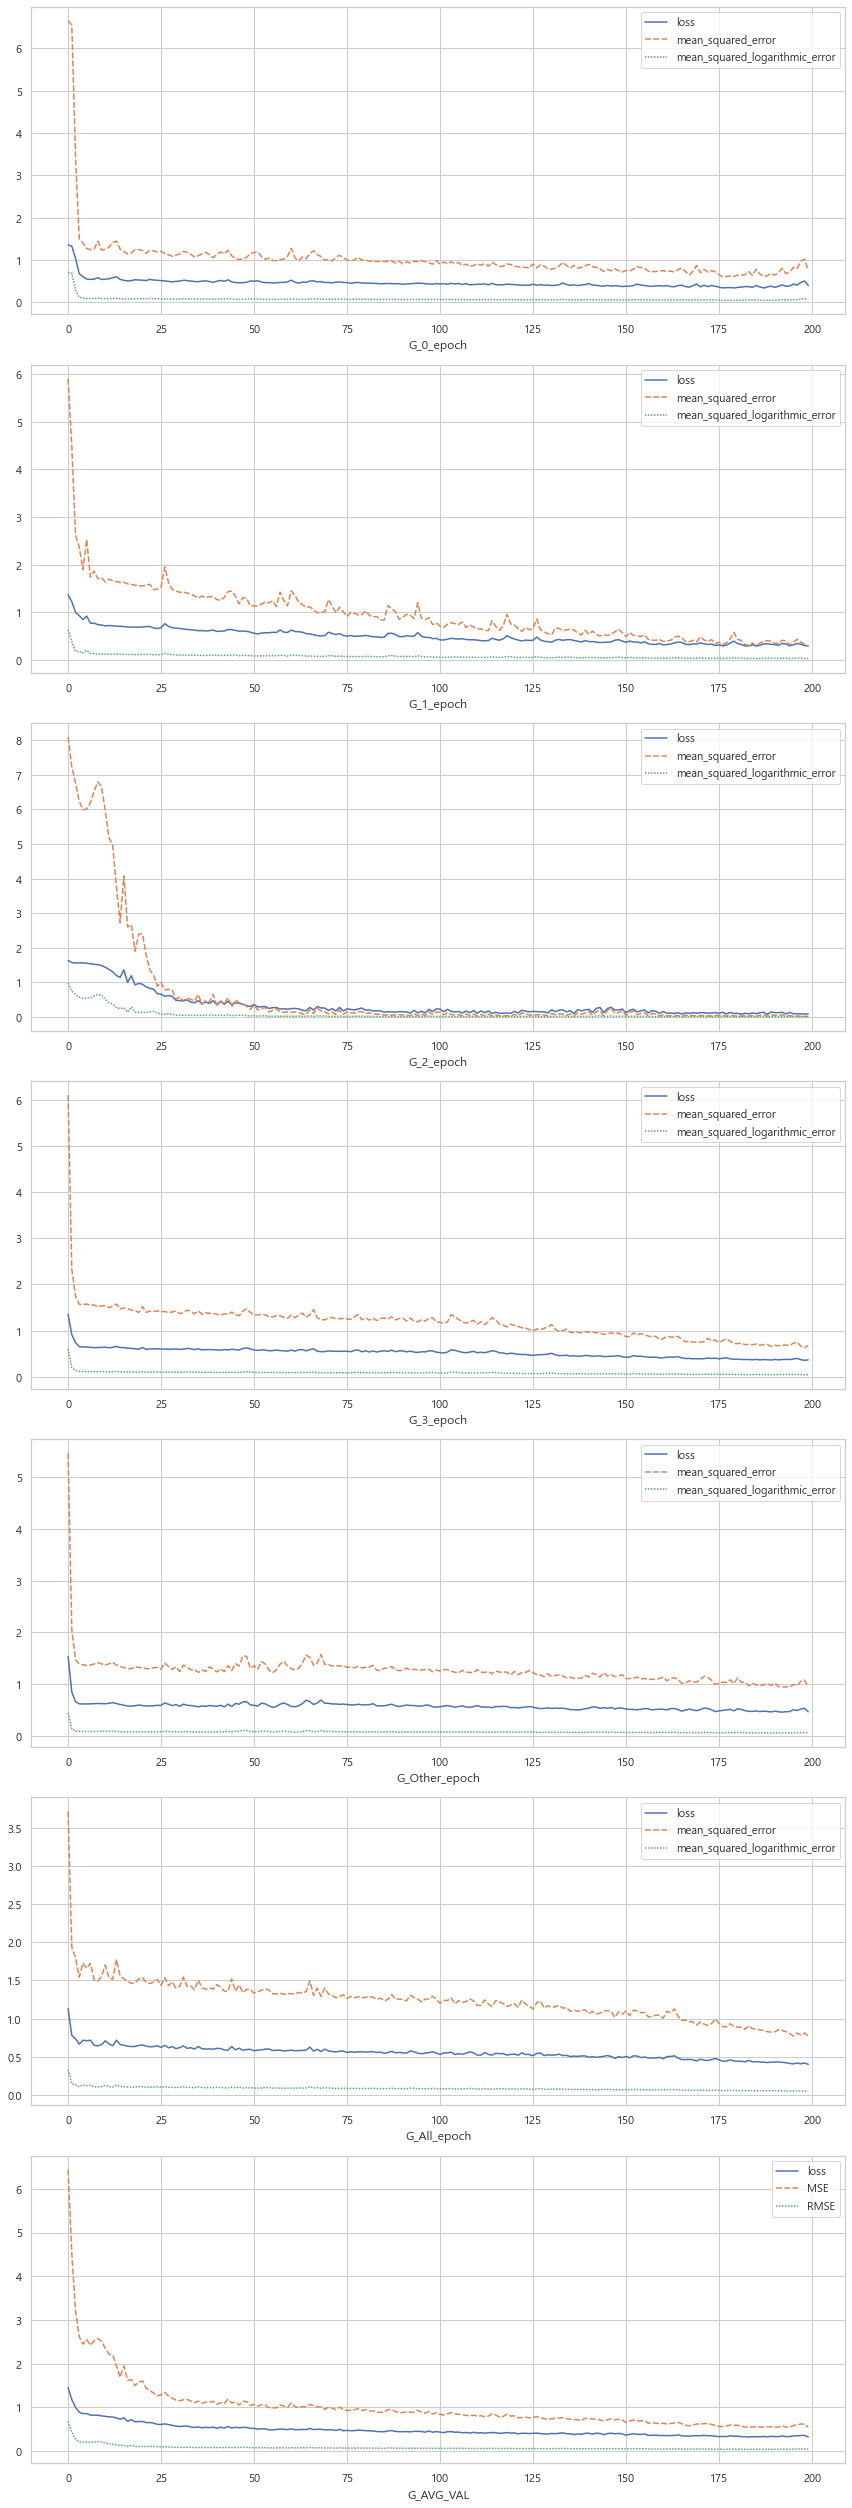

In [137]:
fig = plt.figure(figsize=(12,5*(len(models)+1)))
gs = fig.add_gridspec( (len(models)+1),1)

MSE = []
MAE = []
RMSE = []

for GN in range(len(models)):
    GNAME = str(GN)
    if GN == len(models)-2 and OTHER_FLAG:
        GNAME = 'Other'
    elif GN == len(models)-1:
        GNAME = 'All'
    _path = 'models/'+DATA_NAME+'/'+MODEL_NAME+'/G_'+GNAME
    TDF = read_csv(_path+'/'+DATA_NAME+'_G_'+GNAME+'_epoch'+'.csv')
    ax = fig.add_subplot(gs[GN, 0])
    sns.lineplot(data=TDF[TDF.columns.difference(['epoch'])], legend=True)
    ax.set_xlabel('G_'+GNAME+'_epoch')
    if GN != len(models)-1:
        MAE.append(TDF['loss'].to_list())
        MSE.append(TDF['mean_squared_error'].to_list())
        RMSE.append(TDF['mean_squared_logarithmic_error'].to_list())
        
MSE = np.array(MSE)
MAE = np.array(MAE)
RMSE = np.array(RMSE)

BV = pd.DataFrame( data = {'loss': MAE.mean(axis=0), 'MSE': MSE.mean(axis=0), 'RMSE':RMSE.mean(axis=0)} )

ax = fig.add_subplot(gs[GN+1, 0])
sns.lineplot(data=BV, legend=True)
ax.set_xlabel('G_AVG_VAL')

fig.tight_layout()
plt.show()

GridSpec(7, 1) 0 GridSpec(7, 1)[0:1, 0:1]
GridSpec(7, 1) 1 GridSpec(7, 1)[1:2, 0:1]
GridSpec(7, 1) 2 GridSpec(7, 1)[2:3, 0:1]
GridSpec(7, 1) 3 GridSpec(7, 1)[3:4, 0:1]
GridSpec(7, 1) 4 GridSpec(7, 1)[4:5, 0:1]
GridSpec(7, 1) 5 GridSpec(7, 1)[5:6, 0:1]


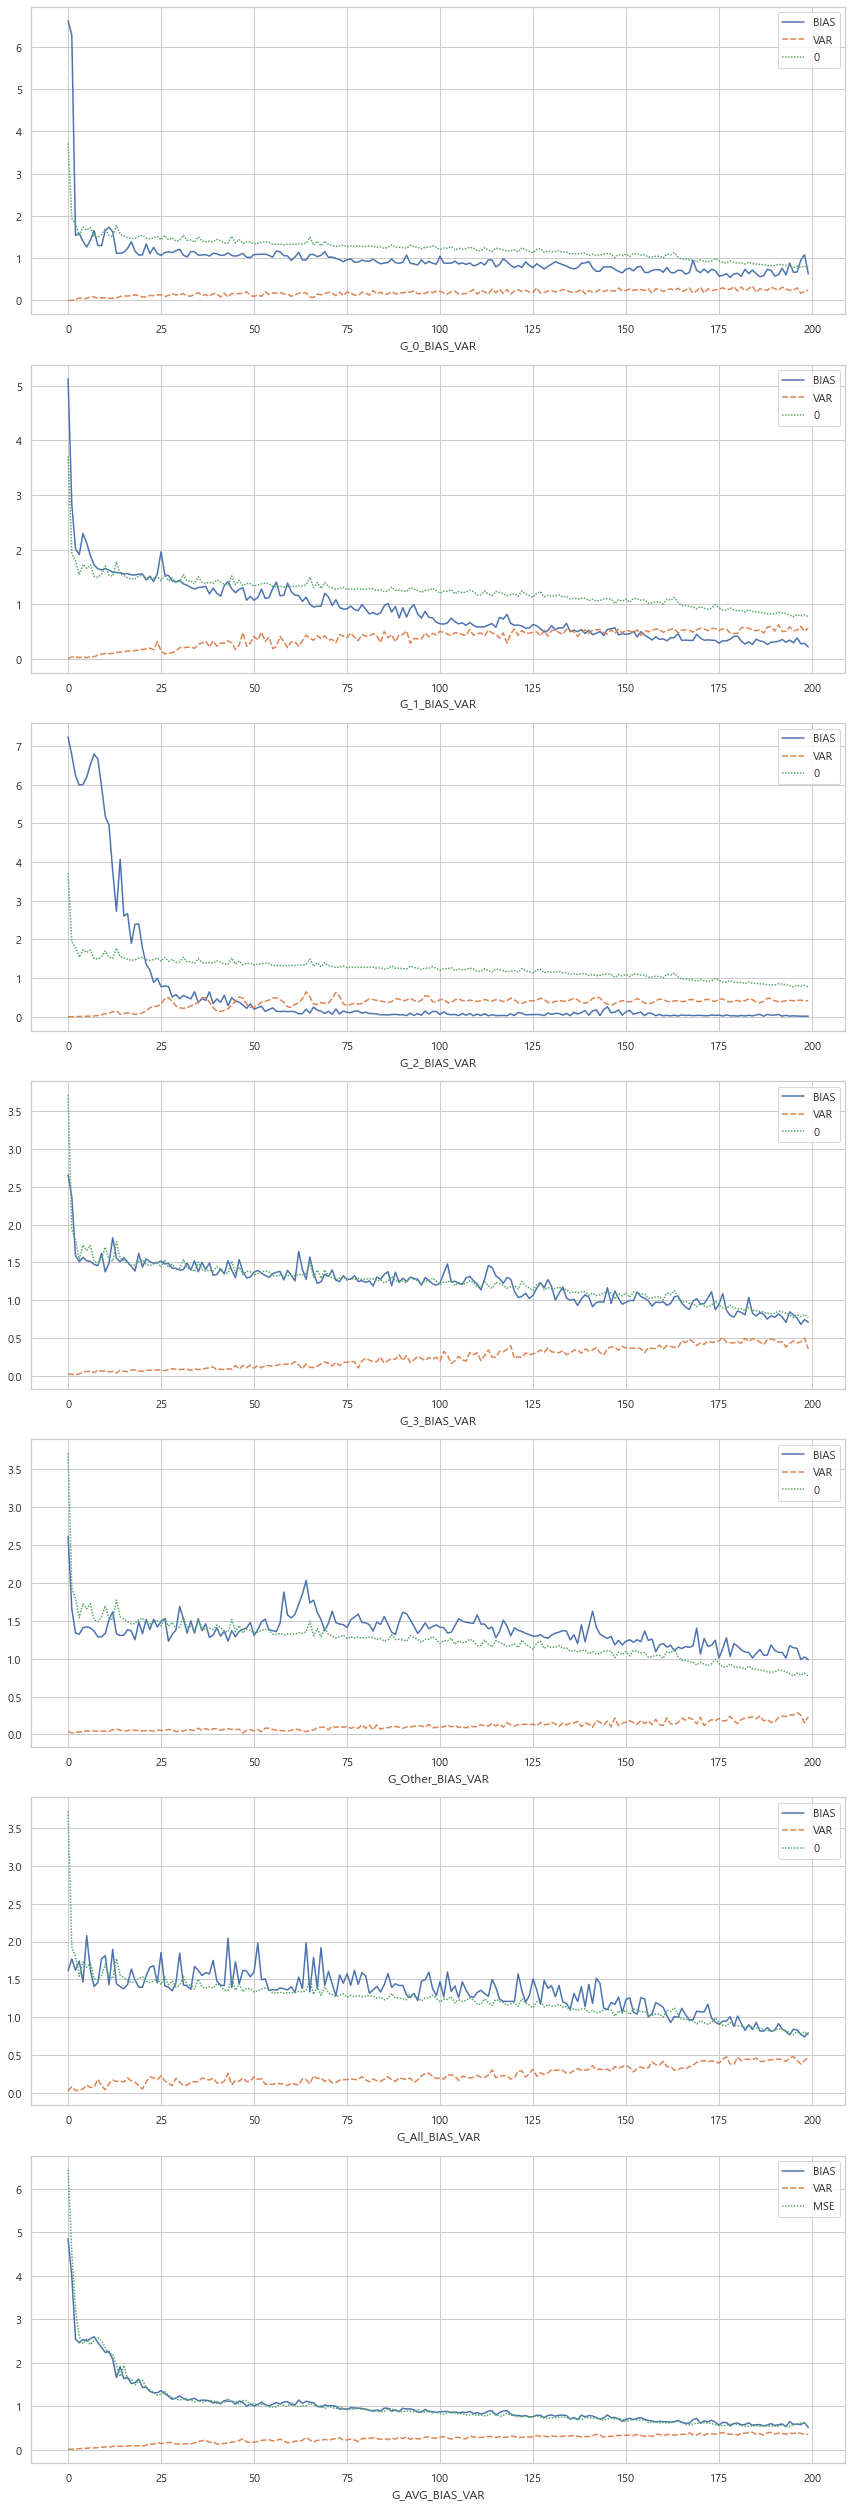

In [142]:
fig = plt.figure(figsize=(12,5*(len(models)+1)))
gs = fig.add_gridspec( (len(models)+1),1)

BIAS = []
VAR = []

for GN in range(len(models)): 
    GNAME = str(GN)
    if GN == len(models)-2 and OTHER_FLAG:
        GNAME = 'Other'
    elif GN == len(models)-1:
        GNAME = 'All'
    _path = 'models/'+DATA_NAME+'/'+MODEL_NAME+'/G_'+GNAME
    TDF2 = read_csv(_path+'/'+DATA_NAME+'_G_'+GNAME+'_BIAS_VAR'+'.csv')
    ax = fig.add_subplot(gs[GN, 0])
    sns.lineplot(data=pd.concat([TDF2, TDF.mean_squared_error]), legend=True)
    if GN != len(models)-1:
        BIAS.append(TDF2['BIAS'].to_list())
        VAR.append(TDF2['VAR'].to_list())

    ax.set_xlabel('G_'+GNAME+'_BIAS_VAR')
BIAS = np.array(BIAS)
VAR = np.array(VAR)

BV = pd.DataFrame( data = {'BIAS': BIAS.mean(axis=0), 'VAR': VAR.mean(axis=0),'MSE': MSE.mean(axis=0)} )

ax = fig.add_subplot(gs[GN+1, 0])
sns.lineplot(data=BV, legend=True)
ax.set_xlabel('G_AVG_BIAS_VAR')

fig.tight_layout()
plt.show()
    

In [122]:
ENS_MODELS = []
for GN in range(len(models)-1):
    GNAME = str(GN)
    if GN == len(models)-2 and OTHER_FLAG:
        GNAME = 'Other'
    _path = 'models/'+DATA_NAME+'/'+MODEL_NAME+'/G_'+GNAME
    ENS_MODELS.append(tf.keras.models.load_model(_path+'/'+DATA_NAME+'_G_'+GNAME+'.h5'))

_path = 'models/'+DATA_NAME+'/'+MODEL_NAME+'/G_All'
ALL_MODELS = tf.keras.models.load_model(_path+'/'+DATA_NAME+'_G_All.h5')
MD = tf.keras.models.load_model(CLASSFICATION_PATH)

class_yhat = MD.predict(enTest_X)

enTest_reg_X = enTest_X.reshape((enTest_X.shape[0],24,len(Features)))

ALL_Y_HAT = ALL_MODELS.predict(enTest_reg_X)
ENS_Y_HATS = []

for M in ENS_MODELS:
    ENS_Y_HATS.append(M.predict(enTest_reg_X))


#CLASS_X = np.reshape(CLASS_X,(1,72))
#CLASS_X.shape



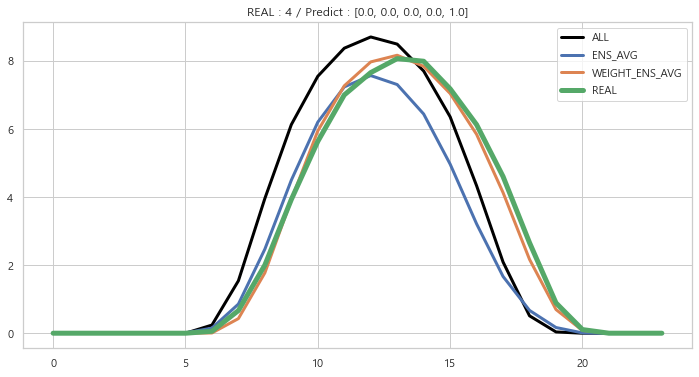

In [123]:
TEST_NUM = 4
WEIGHT_ENS_RESULT = []
ENS_RESULT = []

for i in range(len(ENS_Y_HATS)):
    WEIGHT_ENS_RESULT.append([x*class_yhat[TEST_NUM][i] for x in ENS_Y_HATS[i][TEST_NUM]])
    ENS_RESULT.append([x for x in ENS_Y_HATS[i][TEST_NUM]])
    

WEIGHT_ENS_RESULT = np.array(WEIGHT_ENS_RESULT)
WEIGHT_ENS_RESULT = WEIGHT_ENS_RESULT.reshape((WEIGHT_ENS_RESULT.shape[0],WEIGHT_ENS_RESULT.shape[1]))
WEIGHT_ENS_RESULT = WEIGHT_ENS_RESULT.sum(axis=0)

ENS_RESULT = np.array(ENS_RESULT)
ENS_RESULT = ENS_RESULT.reshape((ENS_RESULT.shape[0],ENS_RESULT.shape[1]))
ENS_RESULT = ENS_RESULT.mean(axis=0)


import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# create data
x = [x for x in range(0,24)]

plt.title('REAL : '+str(enTest_y[TEST_NUM])+' / Predict : '+str([round(t,2) for t in class_yhat[TEST_NUM]]))

#for i in range(len(ENS_Y_HATS)):
#    plt.plot(x, ENS_Y_HATS[i][TEST_NUM], label = "G_"+str(i),alpha=0.5)

plt.plot(x, ALL_Y_HAT[TEST_NUM], label = "ALL", color="black", linewidth=3, alpha=1)
plt.plot(x, ENS_RESULT, label = "ENS_AVG", linewidth=3, alpha=1)
plt.plot(x, WEIGHT_ENS_RESULT, label = "WEIGHT_ENS_AVG", linewidth=3, alpha=1)

plt.plot(x, enTest_dis_y[TEST_NUM], label = "REAL" , linewidth=5, alpha=1)

plt.legend()
plt.show()



In [124]:
WER = []
ER = []
AR = []
for i in range(len(class_yhat[TEST_NUM])):
    WEIGHT_ENS_RESULT = []
    ENS_RESULT = []
    for j in range(len(ENS_Y_HATS)):
        WEIGHT_ENS_RESULT.append([x*class_yhat[i][j] for x in ENS_Y_HATS[j][i]])
        ENS_RESULT.append([x for x in ENS_Y_HATS[j][i]])
    WEIGHT_ENS_RESULT = np.array(WEIGHT_ENS_RESULT)
    WEIGHT_ENS_RESULT = WEIGHT_ENS_RESULT.reshape((WEIGHT_ENS_RESULT.shape[0],WEIGHT_ENS_RESULT.shape[1]))
    WEIGHT_ENS_RESULT = WEIGHT_ENS_RESULT.sum(axis=0)

    ENS_RESULT = np.array(ENS_RESULT)
    ENS_RESULT = ENS_RESULT.reshape((ENS_RESULT.shape[0],ENS_RESULT.shape[1]))
    ENS_RESULT = ENS_RESULT.mean(axis=0)
    
    for q in range(24):
        WER.append(abs(ENS_RESULT[q]-enTest_dis_y[i][q]))
        ER.append(abs(WEIGHT_ENS_RESULT[q]-enTest_dis_y[i][q]))
        AR.append(float(abs(ALL_Y_HAT[i][q]-enTest_dis_y[i][q])))
        

    
print('WEIGHTED Avg. Ensem',sum(WER)/len(WER))
print('AVG Ensem',sum(ER)/len(ER))
print('ALL',sum(AR)/len(AR))

    
    

WEIGHTED Avg. Ensem 0.6843673290249738
AVG Ensem 0.5701810370946703
ALL 0.7515615546628396


In [98]:
spring_y = [x*CY[0] for x in ENS_Y_HATS[0][88]]
summer_y = [x*CY[1] for x in ENS_Y_HATS[1][88]]
autumn_y = [x*CY[2] for x in ENS_Y_HATS[2][88]]
winter_y = [x*CY[3] for x in ENS_Y_HATS[3][88]]
ENS_RESULT = [];
for x in range(len(spring_y)):
    ENS_RESULT.append(spring_y[x]+summer_y[x]+autumn_y[x]+winter_y[x])
print(ENS_RESULT)

[array([0.00605932], dtype=float32), array([-0.00671693], dtype=float32), array([-0.01077399], dtype=float32), array([-0.01656493], dtype=float32), array([-0.02899366], dtype=float32), array([-0.02491196], dtype=float32), array([8.825695], dtype=float32), array([26.762316], dtype=float32), array([46.246075], dtype=float32), array([63.93848], dtype=float32), array([76.21022], dtype=float32), array([84.827156], dtype=float32), array([89.29128], dtype=float32), array([87.65379], dtype=float32), array([79.65645], dtype=float32), array([66.61389], dtype=float32), array([49.736702], dtype=float32), array([29.631063], dtype=float32), array([10.504405], dtype=float32), array([1.76981], dtype=float32), array([0.18270817], dtype=float32), array([0.01037256], dtype=float32), array([-0.02782923], dtype=float32), array([-0.05591202], dtype=float32)]


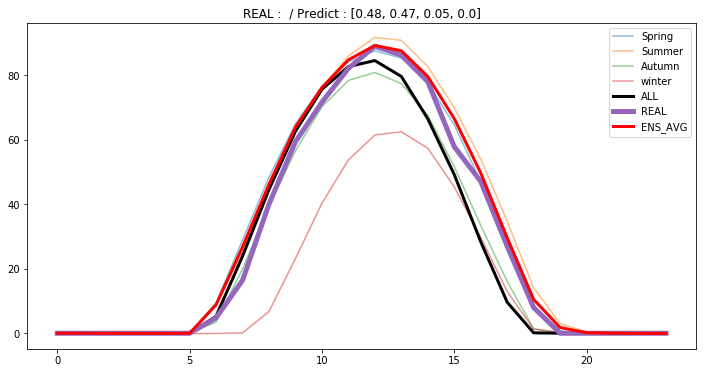

In [99]:

plt.figure(figsize=(12, 6))

# create data
x = [x for x in range(0,24)]
plt.title('REAL : '+' / Predict : '+str([round(t,2) for t in CY]))
plt.plot(x, ENS_Y_HATS[0][88], label = "Spring",alpha=0.5)
plt.plot(x, ENS_Y_HATS[1][88], label = "Summer",alpha=0.5)
plt.plot(x, ENS_Y_HATS[2][88], label = "Autumn",alpha=0.5)
plt.plot(x, ENS_Y_HATS[3][88], label = "winter",alpha=0.5)
plt.plot(x, ALL_Y_HAT[88], label = "ALL", color="black", linewidth=3, alpha=1)

plt.plot(x, enTest_y[88], label = "REAL" , linewidth=5, alpha=1)

plt.plot(x, ENS_RESULT, label = "ENS_AVG", color="red", linewidth=3, alpha=1)

plt.legend()
plt.show()

In [73]:
print(DF[testlinC[0]*24:testlinC[0]*24+24])

      season         GHI     RH     T     TARGET
3624  summer         0.0  86.22  12.0        0.0
3625  summer         0.0  90.05  12.0        0.0
3626  summer         0.0  86.69  11.0        0.0
3627  summer         0.0  88.77  11.0        0.0
3628  summer         0.0  87.05  11.0        0.0
3629  summer     20.9995  83.52  12.0   2.815065
3630  summer  184.612665  79.34  14.0  18.485187
3631  summer  401.109387   64.7  18.0  37.250237
3632  summer  613.730055  44.63  22.0  55.825986
3633  summer  655.787251  35.68  24.0    60.0468
3634  summer  892.143994  33.39  25.0  81.249933
3635  summer  496.646101  31.53  26.0  46.441426
3636  summer       114.0  31.64  26.0  10.695601
3637  summer  905.792725  32.01  26.0   83.03164
3638  summer  925.168666  34.73  25.0   82.93873
3639  summer   781.81057  37.46  24.0  70.085874
3640  summer  315.008588  41.43  23.0  29.366961
3641  summer  389.923539  52.29  21.0  35.747789
3642  summer   178.93979   67.8  19.0   17.45206
3643  summer   18.99

In [74]:
for k in range(100):
    CLASS_X = enTest_X[k:k+1]
    CLASS_X = np.reshape(CLASS_X,(1,72))
    class_yhat = MD.predict(CLASS_X[0:1])
    print(str(testlinC[k]),str(k),[round(x,2) for x in class_yhat[0]])


151 0 [0.0, 1.0, 0.0, 0.0]
45 1 [0.0, 0.0, 0.01, 0.99]
325 2 [0.0, 0.0, 0.0, 1.0]
0 3 [0.0, 0.0, 0.0, 1.0]
160 4 [0.0, 1.0, 0.0, 0.0]
240 5 [0.0, 0.24, 0.76, 0.0]
248 6 [0.0, 0.0, 1.0, 0.0]
80 7 [0.41, 0.0, 0.59, 0.0]
2 8 [0.0, 0.0, 0.0, 1.0]
151 9 [0.0, 1.0, 0.0, 0.0]
275 10 [0.03, 0.0, 0.95, 0.02]
54 11 [0.0, 0.0, 0.0, 1.0]
232 12 [0.0, 0.72, 0.28, 0.0]
187 13 [0.0, 1.0, 0.0, 0.0]
262 14 [0.0, 0.0, 1.0, 0.0]
54 15 [0.0, 0.0, 0.0, 1.0]
205 16 [0.0, 0.0, 1.0, 0.0]
86 17 [0.0, 0.0, 1.0, 0.0]
113 18 [1.0, 0.0, 0.0, 0.0]
159 19 [0.0, 1.0, 0.0, 0.0]
227 20 [0.07, 0.0, 0.93, 0.0]
63 21 [1.0, 0.0, 0.0, 0.0]
71 22 [1.0, 0.0, 0.0, 0.0]
77 23 [0.96, 0.0, 0.04, 0.0]
239 24 [0.0, 0.0, 1.0, 0.0]
195 25 [0.0, 0.0, 1.0, 0.0]
132 26 [0.47, 0.53, 0.0, 0.0]
311 27 [0.0, 0.0, 1.0, 0.0]
207 28 [0.11, 0.89, 0.0, 0.0]
317 29 [0.0, 0.0, 1.0, 0.0]
250 30 [0.0, 0.98, 0.02, 0.0]
289 31 [0.0, 0.0, 1.0, 0.0]
69 32 [0.07, 0.29, 0.64, 0.0]
179 33 [0.0, 1.0, 0.0, 0.0]
264 34 [0.0, 1.0, 0.0, 0.0]
168 35 [0.0, 1.0, 0

[array([-0.01426178], dtype=float32), array([-0.0200482], dtype=float32), array([-0.05645509], dtype=float32), array([-0.05241486], dtype=float32), array([-0.00823432], dtype=float32), array([5.8097568], dtype=float32), array([22.849203], dtype=float32), array([41.030502], dtype=float32), array([56.510937], dtype=float32), array([67.80393], dtype=float32), array([73.554756], dtype=float32), array([75.93917], dtype=float32), array([76.16561], dtype=float32), array([72.78563], dtype=float32), array([64.71867], dtype=float32), array([54.17943], dtype=float32), array([43.35489], dtype=float32), array([31.54638], dtype=float32), array([18.018429], dtype=float32), array([6.2966256], dtype=float32), array([1.01844], dtype=float32), array([0.09923891], dtype=float32), array([0.03506627], dtype=float32), array([0.01847166], dtype=float32)]


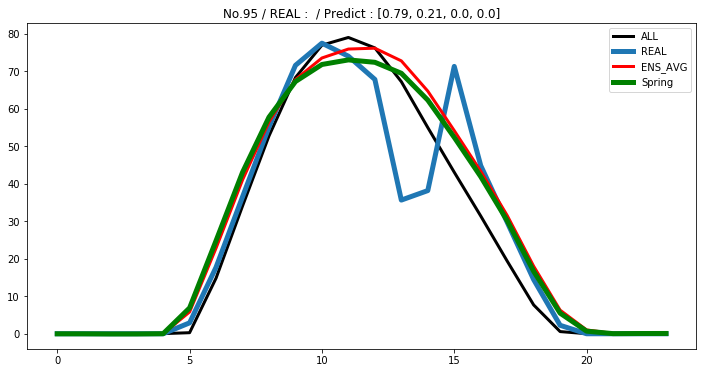

In [108]:
CASE_NUM = 95
CLASS_X = enTest_X[CASE_NUM:CASE_NUM+1]
CLASS_X = np.reshape(CLASS_X,(1,72))
class_yhat = MD.predict(CLASS_X[0:1])
CY = class_yhat[0]

spring_y = [x*CY[0] for x in ENS_Y_HATS[0][CASE_NUM]]
summer_y = [x*CY[1] for x in ENS_Y_HATS[1][CASE_NUM]]
autumn_y = [x*CY[2] for x in ENS_Y_HATS[2][CASE_NUM]]
winter_y = [x*CY[3] for x in ENS_Y_HATS[3][CASE_NUM]]

ENS_RESULT = [];
for x in range(len(spring_y)):
    ENS_RESULT.append(spring_y[x]+summer_y[x]+autumn_y[x]+winter_y[x])
print(ENS_RESULT)


plt.figure(figsize=(12, 6))

# create data
x = [x for x in range(0,24)]
plt.title('No.'+str(CASE_NUM)+' / REAL : '+' / Predict : '+str([round(t,2) for t in CY]))

plt.plot(x, ALL_Y_HAT[CASE_NUM], label = "ALL", color="black", linewidth=3, alpha=1)

plt.plot(x, enTest_y[CASE_NUM], label = "REAL" , linewidth=5, alpha=1)

plt.plot(x, ENS_RESULT, label = "ENS_AVG", color="red", linewidth=3, alpha=1)
plt.plot(x, ENS_Y_HATS[0][CASE_NUM], label = "Spring",color="green", linewidth=5, alpha=1)

plt.legend()
plt.show()

In [75]:
CASE_NUM = 4
CLASS_X = enTest_X[CASE_NUM:CASE_NUM+1]
CLASS_X = np.reshape(CLASS_X,(1,72))
class_yhat = MD.predict(CLASS_X[0:1])
CY = class_yhat[0]

In [76]:
spring_y = [x*CY[0] for x in ENS_Y_HATS[0][CASE_NUM]]
summer_y = [x*CY[1] for x in ENS_Y_HATS[1][CASE_NUM]]
autumn_y = [x*CY[2] for x in ENS_Y_HATS[2][CASE_NUM]]
winter_y = [x*CY[3] for x in ENS_Y_HATS[3][CASE_NUM]]

In [77]:
ENS_RESULT = [];
for x in range(len(spring_y)):
    ENS_RESULT.append(spring_y[x]+summer_y[x]+autumn_y[x]+winter_y[x])
print(ENS_RESULT)

[array([-0.01573298], dtype=float32), array([-0.00799471], dtype=float32), array([-0.03738719], dtype=float32), array([-0.06176573], dtype=float32), array([-0.11457781], dtype=float32), array([1.7230115], dtype=float32), array([15.517646], dtype=float32), array([33.895947], dtype=float32), array([52.40765], dtype=float32), array([70.54857], dtype=float32), array([83.02058], dtype=float32), array([92.05417], dtype=float32), array([95.60867], dtype=float32), array([93.66568], dtype=float32), array([85.54496], dtype=float32), array([72.6705], dtype=float32), array([56.52557], dtype=float32), array([38.357376], dtype=float32), array([19.69754], dtype=float32), array([6.1696515], dtype=float32), array([1.3547331], dtype=float32), array([0.28675365], dtype=float32), array([0.04685507], dtype=float32), array([-0.01930561], dtype=float32)]


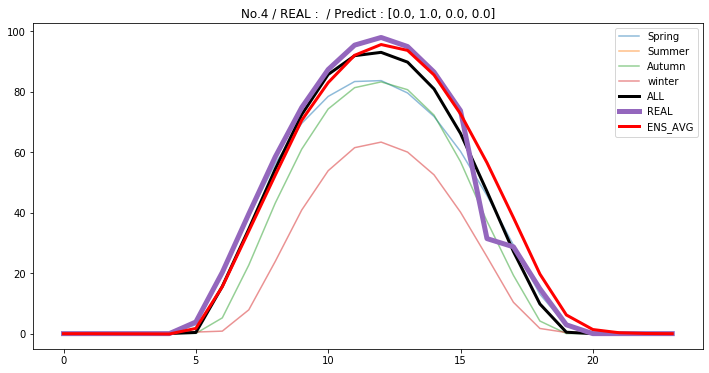

In [78]:

plt.figure(figsize=(12, 6))

# create data
x = [x for x in range(0,24)]
plt.title('No.'+str(CASE_NUM)+' / REAL : '+' / Predict : '+str([round(t,2) for t in CY]))
plt.plot(x, ENS_Y_HATS[0][CASE_NUM], label = "Spring",alpha=0.5)
plt.plot(x, ENS_Y_HATS[1][CASE_NUM], label = "Summer",alpha=0.5)
plt.plot(x, ENS_Y_HATS[2][CASE_NUM], label = "Autumn",alpha=0.5)
plt.plot(x, ENS_Y_HATS[3][CASE_NUM], label = "winter",alpha=0.5)
plt.plot(x, ALL_Y_HAT[CASE_NUM], label = "ALL", color="black", linewidth=3, alpha=1)

plt.plot(x, enTest_y[CASE_NUM], label = "REAL" , linewidth=5, alpha=1)

plt.plot(x, ENS_RESULT, label = "ENS_AVG", color="red", linewidth=3, alpha=1)

plt.legend()
plt.show()

In [113]:
CASE_NUM = 4
CLASS_X = enTest_X[CASE_NUM:CASE_NUM+1]
CLASS_X = np.reshape(CLASS_X,(1,72))
class_yhat = MD.predict(CLASS_X[0:1])
CY = class_yhat[0]

In [114]:
spring_y = [x for x in ENS_Y_HATS[0][CASE_NUM]]
summer_y = [x for x in ENS_Y_HATS[1][CASE_NUM]]
autumn_y = [x for x in ENS_Y_HATS[2][CASE_NUM]]
winter_y = [x for x in ENS_Y_HATS[3][CASE_NUM]]


In [115]:

ENS_RESULT = [];
for x in range(len(spring_y)):
    ENS_RESULT.append((spring_y[x]+summer_y[x]+autumn_y[x]+winter_y[x])/4)
print(ENS_RESULT)

[array([0.02805915], dtype=float32), array([0.02811512], dtype=float32), array([0.02444718], dtype=float32), array([0.02590999], dtype=float32), array([0.07563231], dtype=float32), array([1.3088375], dtype=float32), array([10.279532], dtype=float32), array([25.779629], dtype=float32), array([43.928783], dtype=float32), array([60.487164], dtype=float32), array([72.409744], dtype=float32), array([79.567184], dtype=float32), array([81.466965], dtype=float32), array([78.48757], dtype=float32), array([70.53124], dtype=float32), array([57.494583], dtype=float32), array([41.209583], dtype=float32), array([24.317902], dtype=float32), array([9.648948], dtype=float32), array([2.3087692], dtype=float32), array([0.45176706], dtype=float32), array([0.1215157], dtype=float32), array([0.05358549], dtype=float32), array([0.01799552], dtype=float32)]


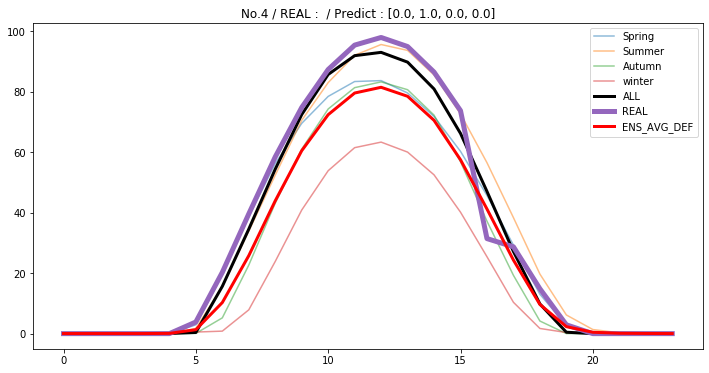

In [117]:

plt.figure(figsize=(12, 6))

# create data
x = [x for x in range(0,24)]
plt.title('No.'+str(CASE_NUM)+' / REAL : '+' / Predict : '+str([round(t,2) for t in CY]))
plt.plot(x, ENS_Y_HATS[0][CASE_NUM], label = "Spring",alpha=0.5)
plt.plot(x, ENS_Y_HATS[1][CASE_NUM], label = "Summer",alpha=0.5)
plt.plot(x, ENS_Y_HATS[2][CASE_NUM], label = "Autumn",alpha=0.5)
plt.plot(x, ENS_Y_HATS[3][CASE_NUM], label = "winter",alpha=0.5)
plt.plot(x, ALL_Y_HAT[CASE_NUM], label = "ALL", color="black", linewidth=3, alpha=1)

plt.plot(x, enTest_y[CASE_NUM], label = "REAL" , linewidth=5, alpha=1)

plt.plot(x, ENS_RESULT, label = "ENS_AVG_DEF", color="red", linewidth=3, alpha=1)

plt.legend()
plt.show()

In [79]:
#print(enTest_DF[testlinC[CASE_NUM]])
print(enTest_DF[4])

[[21360 'summer' 0.0 0.0 0.0 4.7 42.1 16.0 0.0]
 [21361 'summer' 0.0 0.0 0.0 4.6 43.96 16.0 0.0]
 [21362 'summer' 0.0 0.0 0.0 4.1 45.32 15.0 0.0]
 [21363 'summer' 0.0 0.0 0.0 3.6 46.64 14.0 0.0]
 [21364 'summer' 0.0 0.0 0.0 3.1 45.26 13.0 0.0]
 [21365 'summer' 22.0 280.0 21.998971502571063 3.1 42.93 15.0 3.847128682]
 [21366 'summer' 51.0 661.0 198.08430838968297 3.6 32.61 18.0 20.26713155]
 [21367 'summer' 67.0 822.0 423.6504904373261 4.1 24.48 22.0 39.59422902]
 [21368 'summer' 77.0 903.0 640.0098092142623 3.3 19.06 25.0 58.45116402]
 [21369 'summer' 86.0 948.0 827.175314900825 2.1 16.99 27.0 74.77456421]
 [21370 'summer' 92.0 971.0 966.8403285826558 1.7 15.5 29.0 87.34452786]
 [21371 'summer' 87.0 996.0 1058.0280842335956 1.9 14.01 31.0 95.41077526]
 [21372 'summer' 89.0 995.0 1084.0 2.3 13.35 32.0 97.94272793]
 [21373 'summer' 89.0 987.0 1051.253734074858 2.6 12.75 32.0 94.94065198]
 [21374 'summer' 92.0 961.0 957.8306444571908 2.9 12.82 33.0 86.49636244]
 [21375 'summer' 87.0 930.

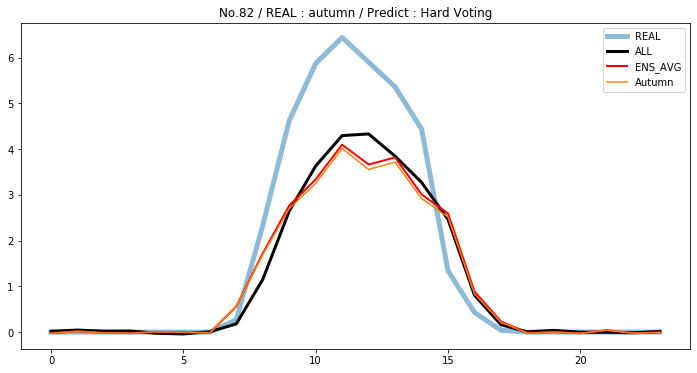

In [59]:

plt.figure(figsize=(12, 6))

# create data
x = [x for x in range(0,24)]
plt.title('No.'+str(CASE_NUM)+' / REAL : '+DISPLAY_Y[CASE_NUM]+' / Predict : Hard Voting')

plt.plot(x, enTest_y[CASE_NUM], label = "REAL" , linewidth=5, alpha=0.5)



plt.plot(x, ALL_Y_HAT[CASE_NUM], label = "ALL", color="black", linewidth=3, alpha=1)



plt.plot(x, ENS_RESULT, label = "ENS_AVG", color="red", linewidth=2, alpha=1)

plt.plot(x, ENS_Y_HATS[2][CASE_NUM], label = "Autumn",alpha=2.0)

plt.legend()
plt.show()

In [47]:
print(enTest_y[CASE_NUM])

[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.03 0.19 0.34 0.8  0.77
 0.53 0.36 0.22 0.1  0.   0.   0.   0.   0.   0.  ]


In [9]:
from sklearn.metrics import jaccard_score 
y_hat_2 = new_model_2.predict(test_X)

scores2 = [];
for i in range(len(y_hat_2)):
    score = [];
    for j in range(len(y_hat_2[i])):
        score.append(abs(y_hat_2[i][j]-test_y[i][j]))
    scores2.append(sum(score))
    
print(-sum(scores2))


-78.96854687690127


In [10]:
ensembled =  [];
for i in range(len(scores)):
    ensembled.append(min(scores[i],scores2[i]))

print(-sum(ensembled))

-74.04462502495889


In [12]:
from sklearn.ensemble import VotingRegressor

In [13]:
ensemble_clf = VotingClassifier([ClassifierChain(base_lr, order='random', random_state=i) for i in range(10)])
ensemble_clf.fit(X_train, Y_train)
Y_pred_ensemble = ensemble_clf.predict(X_test)

er = VotingRegressor([('m1', new_model_1), ('m2', new_model_2)])

In [22]:
TY = list(train_y)
TX = list(train_X)

eTX = list(enTest_X)
print(TY)

[array([0.28172589, 0.26142132, 0.25126904, 0.24873096, 0.24619289,
       0.24873096, 0.23857868, 0.24111675, 0.24111675, 0.31472081,
       0.50507614, 0.55329949, 0.5964467 , 0.60152284, 0.57106599,
       0.56852792, 0.56852792, 0.54568528, 0.53553299, 0.52284264,
       0.5177665 , 0.51269036, 0.46446701, 0.44416244]), array([0.43908629, 0.43654822, 0.43654822, 0.36548223, 0.31979695,
       0.30203046, 0.28172589, 0.26903553, 0.24873096, 0.24619289,
       0.2284264 , 0.23096447, 0.2284264 , 0.23604061, 0.23350254,
       0.21573604, 0.21319797, 0.18020305, 0.19035533, 0.18020305,
       0.1751269 , 0.16751269, 0.16497462, 0.15482234]), array([0.16243655, 0.15482234, 0.15228426, 0.14720812, 0.13959391,
       0.13705584, 0.13451777, 0.13705584, 0.1319797 , 0.11928934,
       0.12944162, 0.14720812, 0.14213198, 0.14720812, 0.12690355,
       0.1319797 , 0.13705584, 0.1142132 , 0.10913706, 0.10659898,
       0.08883249, 0.08883249, 0.08883249, 0.08121827]), array([0.08375635, 0.088

In [23]:
eny_hat = er.fit(train_X, train_y).predict(eTX)
print(eny_hat)

ValueError: y should be a 1d array, got an array of shape (1, 99, 24) instead.

In [7]:
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Concatenate
from numpy import argmax


In [8]:
'''
def define_stacked_model(members):
    # update all layers in all models to not be trainable
    stacked = []
    for i in range(len(members)):
        stacked.append(members[i])
        print(stacked[i].layers)
        for layer in stacked[i].layers:
            # make not trainable
            layer.trainable = False
            print(layer.trainable)
            # rename to avoid 'unuque layer name' issue
            layer._name = 'ensemble_' + str(i+1) + '_' + layer._name
            print(layer.name)

    # define multi-headed input
    #print([model.input._name for model in stacked])
    ensemble_visible = [model.input for model in stacked]
    
    print(ensemble_visible)
    
    # concatenate merge output from each model
    ensemble_outputs = [model.output for model in stacked]
    
    merge = Concatenate()(ensemble_outputs)
    print(merge)
    print(ensemble_visible)

    hidden = Dense(48, activation = 'relu')(merge)    
    output = Dense(24, activation = 'relu')(hidden)
    resmodel = Model(inputs=ensemble_visible, outputs=output)
    #model = Model()


    # compile
    resmodel.compile(loss='mae', optimizer='adam', metrics=['accuracy'])
    return resmodel
'''

In [8]:

def define_stacked_model(members):
    # update all layers in all models to not be trainable
    stacked = []
    for i in range(len(members)):
        stacked.append(members[i])
        stacked[i].layers.pop(0)
        print(stacked[i].layers)
        for layer in stacked[i].layers:
            # make not trainable
            layer.trainable = False
            # rename to avoid 'unuque layer name' issue
            layer._name = 'ensemble_' + str(i+1) + '_' + layer._name

    # define multi-headed input
    #print([model.input._name for model in stacked])
    ensemble_visible = [model.input for model in stacked]
    
    print(ensemble_visible)
    
    # concatenate merge output from each model
    ensemble_outputs = [model.output for model in stacked]
    
    merge = Concatenate()(ensemble_outputs)

    hidden = Dense(48, activation = 'relu')(merge)
    hidden = Dense(48, activation = 'relu')(hidden)
    hidden = Dense(48, activation = 'relu')(hidden)
    hidden = Dense(48, activation = 'relu')(hidden)
    hidden = Dense(48, activation = 'relu')(hidden)
    hidden = Dense(48, activation = 'relu')(hidden)
    output = Dense(24, activation = 'relu')(hidden)
    resmodel = Model(inputs=ensemble_visible, outputs=output)
    #model = Model()


    # compile
    resmodel.compile(loss='mae', optimizer='adam', metrics=['accuracy'])
    return resmodel

In [9]:
# fit a stacked model
def fit_stacked_model(model, inputX, inputy):
    # prepare input data
    X = [inputX for _ in range(len(model.input))]
    print(X)
    # encode output data
    inputy_enc = inputy
    # fir model
    model.fit(X, inputy_enc, epochs=100, verbose=0)

In [10]:
# make a prediction with a stacked model
def predict_stacked_model(model, inputX):
    # prepare input data
    X = [inputX for _ in range(len(model.input))]
    # make prediction
    return model.predict(X, verbose=0)

In [29]:
allmodels[0].get_weights()

[array([[ 0.11400803, -0.07986153, -0.11942217, ..., -0.07593476,
         -0.01110856, -0.09566356],
        [-0.00170244,  0.06962185, -0.10666756, ..., -0.1434741 ,
         -0.08166353,  0.04757338],
        [-0.04777295, -0.11927611, -0.09481485, ...,  0.04283136,
          0.03406397, -0.01361871],
        [ 0.1015773 , -0.0411646 ,  0.05193997, ...,  0.07580056,
         -0.05787716,  0.06933513]], dtype=float32),
 array([[-0.06919399,  0.08687636, -0.06762175, ...,  0.04445713,
          0.05050233,  0.07676825],
        [-0.04003389, -0.00470281, -0.00836271, ...,  0.0612854 ,
         -0.02343655, -0.00958333],
        [-0.10643806,  0.0638142 ,  0.02757775, ...,  0.04064193,
          0.04275786, -0.03498914],
        ...,
        [ 0.11628837,  0.10846146, -0.02343175, ..., -0.01726292,
         -0.02079818, -0.03773096],
        [ 0.02132194,  0.00076812,  0.04183189, ...,  0.04062323,
         -0.01127448, -0.13545634],
        [ 0.01659483, -0.04090573,  0.03186158, ...,

In [35]:
allmodels[1].layers.pop(0)
allmodels[1].summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
ensemble_2_ensemble_2_ensemb [(None, 24, 4)]           0         
_________________________________________________________________
ensemble_2_ensemble_2_ensemb (None, 120)               60000     
_________________________________________________________________
ensemble_2_ensemble_2_ensemb (None, 24)                2904      
Total params: 125,808
Trainable params: 62,904
Non-trainable params: 62,904
_________________________________________________________________


In [38]:
newInput = tf.keras.Input(shape=(train_X.shape[1], train_X.shape[2]))    # let us say this new InputLayer
allmodels[1].layers[0] = newInput
allmodels[1].summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
ensemble_2_ensemble_2_ensemb [(None, 24, 4)]           0         
_________________________________________________________________
ensemble_2_ensemble_2_ensemb (None, 120)               60000     
_________________________________________________________________
ensemble_2_ensemble_2_ensemb (None, 24)                2904      
Total params: 125,808
Trainable params: 62,904
Non-trainable params: 62,904
_________________________________________________________________


In [11]:

allmodels=[]
allmodels.append(new_model_1)
allmodels.append(new_model_2)

# define ensemble model



In [12]:
stacked_model = define_stacked_model(allmodels)


[<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x14fd5cee0>, <tensorflow.python.keras.layers.recurrent_v2.LSTM object at 0x131277fd0>, <tensorflow.python.keras.layers.core.Dense object at 0x114be8b50>]
[<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x14ffb7580>, <tensorflow.python.keras.layers.recurrent_v2.LSTM object at 0x14ffb7af0>, <tensorflow.python.keras.layers.core.Dense object at 0x14fffef10>]
[<tf.Tensor 'input_1:0' shape=(?, 24, 4) dtype=float32>, <tf.Tensor 'input_1_1:0' shape=(?, 24, 4) dtype=float32>]


In [13]:
#fit stacked model on test dataset
fit_stacked_model(stacked_model, enTest_X, enTest_y)
stacked_model.summary()

[array([[[0.29441624, 0.        , 0.97      , 0.        ],
        [0.27664975, 0.        , 0.97      , 0.        ],
        [0.26395939, 0.        , 0.98      , 0.        ],
        ...,
        [0.5       , 0.01445783, 0.83      , 1.        ],
        [0.4822335 , 0.        , 0.78      , 0.4       ],
        [0.46700508, 0.        , 0.68      , 0.        ]],

       [[0.22588832, 0.        , 0.75      , 0.9       ],
        [0.22335025, 0.        , 0.76      , 0.        ],
        [0.2284264 , 0.        , 0.72      , 0.        ],
        ...,
        [0.17258883, 0.        , 0.67      , 0.5       ],
        [0.16497462, 0.        , 0.66      , 0.9       ],
        [0.16243655, 0.        , 0.64      , 0.9       ]],

       [[0.74111675, 0.        , 0.97      , 0.7       ],
        [0.73857868, 0.        , 0.97      , 0.7       ],
        [0.73857868, 0.        , 0.97      , 0.6       ],
        ...,
        [0.69796954, 0.        , 0.97      , 0.1       ],
        [0.68020305, 0.     

In [14]:
# make predictions and evaluate
yhat = predict_stacked_model(stacked_model, enTest_X)
Syhat_1 = new_model_1.predict(enTest_X)
Syhat_2 = new_model_2.predict(enTest_X)



In [15]:

scores = [];
for i in range(len(yhat)):
    score = [];
    for j in range(len(yhat[i])):
        score.append(abs(yhat[i][j]-enTest_y[i][j]))
    scores.append(sum(score))
    
print(-sum(scores))

-350.2839625329536


In [16]:
scores = [];
for i in range(len(Syhat_1)):
    score = [];
    for j in range(len(Syhat_1[i])):
        score.append(abs(Syhat_1[i][j]-enTest_y[i][j]))
    scores.append(sum(score))
    
print(-sum(scores))

-124.07145633772583


In [17]:
scores = [];
for i in range(len(Syhat_2)):
    score = [];
    for j in range(len(Syhat_2[i])):
        score.append(abs(Syhat_2[i][j]-enTest_y[i][j]))
    scores.append(sum(score))
    
print(-sum(scores))

-80.32773431407544


In [21]:
enTest_y[1]

array([0.15736041, 0.14213198, 0.13705584, 0.13451777, 0.12436548,
       0.11167513, 0.10152284, 0.09898477, 0.09390863, 0.17766497,
       0.2893401 , 0.47969543, 0.50253807, 0.5177665 , 0.53553299,
       0.51015228, 0.49238579, 0.46446701, 0.39340102, 0.34010152,
       0.30964467, 0.29187817, 0.28172589, 0.25888325])

In [27]:
from sklearn.ensemble import VotingRegressor, VotingClassifier


In [30]:
estimators = [('m2', new_model_2),('m1', new_model_1)]

# 평점 예측 모형
reg_rating = VotingRegressor(estimators)
reg_rating.fit(Xdata, Ydata)

reg_pred = reg_rating.predict(enTest_X)


ValueError: y should be a 1d array, got an array of shape (332, 24) instead.

In [ ]:

#TEST = series_to_supervised(TEST)
#TEST.drop(TEST.columns[[5,6,7,8,9]], axis=1, inplace=True)

#TEST = pd.DataFrame(TEST)

#tmp=DF['pow'].multiply(0.001).tolist()
#tmp=DF['TARGET'].to_list()
#print(type(tmp[0]))
#tmp = tmp[:]

#TRAIN_Y=np.array(tmp[:n_train_hours*24])
#TEST_Y=np.array(tmp[n_train_hours:])
#print(TRAIN_Y.shape)

#TRAIN_Y = np.reshape(TRAIN_Y,(TRAIN_Y.shape[0],1))


#TEST.insert(loc=0, column='t_pow', value=tmp[:len(tmp)-24])
#TEST.insert(loc=3, column='TARGET', value=tmp)

#Yscaler = preprocessing.MinMaxScaler(feature_range=(0, 10))

#YTEST = Yscaler.fit_transform(TRAIN_Y)
#YTEST = np.reshape(YTEST,(YTEST.shape[0],))


#y = DF['TARGET']
#x = DF[['GHI','RH','T']]

#X_display = x
#y_display = y

#print(TEST.shape)


#values = TEST.values

#n_train_hours = int((values.shape[0]/24)*0.7) #70% 데이터만 가져온다
#n_train_hours_end = int((values.shape[0]/24)*0.6) #70% 데이터만 가져온다

print(values.shape)

Xdata = values[:, :-1]
#Xdata = Xdata[:-(Xdata.shape[0]%(24*5)), :]
Xdata = Xdata.reshape((int(Xdata.shape[0]/24),24,3))

Ydata = values[:, -1]

#Ydata = Ydata[:-(Ydata.shape[0]%(24*5))]
Ydata = Ydata.reshape((int(Ydata.shape[0]/24),24))


train_X = Xdata
test_X = Xdata

#train_y = Ydata.reshape((int(Ydata.shape[0]/24),24))
train_y = Ydata
test_y = Ydata


#train_X = Xdata[n_train_hours:n_train_hours_end, :]
#test_X = Xdata[n_train_hours_end:, :]

#train_y = Ydata[n_train_hours:n_train_hours_end, :]
#test_y = Ydata[n_train_hours_end:, :]


#train = values[:n_train_hours, :]
#validate = values[n_train_hours:n_train_hours*2, :]
#test = values[n_train_hours:, :]
# split into input and outputs
#train_X, train_y = train[:, :-1], train[:, -1]
#test_X, test_y = test[:, :-1], test[:, -1]
#validate_X, validate_y = validate[:, 1:], validate[:, 1]

#print(train_X,train_y)



#train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
#test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

print(train_X.shape)
print(test_X.shape)
print(train_y[0])

train_y = train_y.reshape((train_y.shape[0],train_y.shape[1],1))
print(train_y.shape)

In [ ]:


'''
inputs = tf.keras.Input(shape=(train_X.shape[1], train_X.shape[2]))
x = tf.keras.layers.LSTM(120)(inputs)
prediction = tf.keras.layers.Dense(24)(x)

model_functional = tf.keras.Model(inputs=inputs, outputs=prediction, name=MNAME)

optimizer = tf.keras.optimizers.Adam()

model_functional.compile(loss='mean_squared_error', optimizer=optimizer, metrics=["mean_squared_error"])

#model_functional.compile(loss='mean_absolute_error', optimizer=optimizer, metrics=["mean_absolute_error"])
#model.compile(loss='mean_squared_logarithmic_error', optimizer=optimizer, metrics=['accuracy'])

history = model_functional.fit(train_X, train_y, epochs=100, verbose=1, shuffle=False, 
                    validation_data=(test_X, test_y), callbacks=[weight_callback] )
#validation_data=(test_X, test_y),

'''